In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import criticality as crfn
import IS as isfn


# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [105]:
%autoreload
adfn.save_shared_files(Fcode, 'criticality', 'admin')

# Avalanche statistics

In [2]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
import glob
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdata + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))

p5list = sorted(glob.glob('*PTZ05*_av.npy*'))

p20list = sorted(glob.glob('*PTZ20*_av.npy*'))
blnlist, p5list, p20list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-09_2photon_

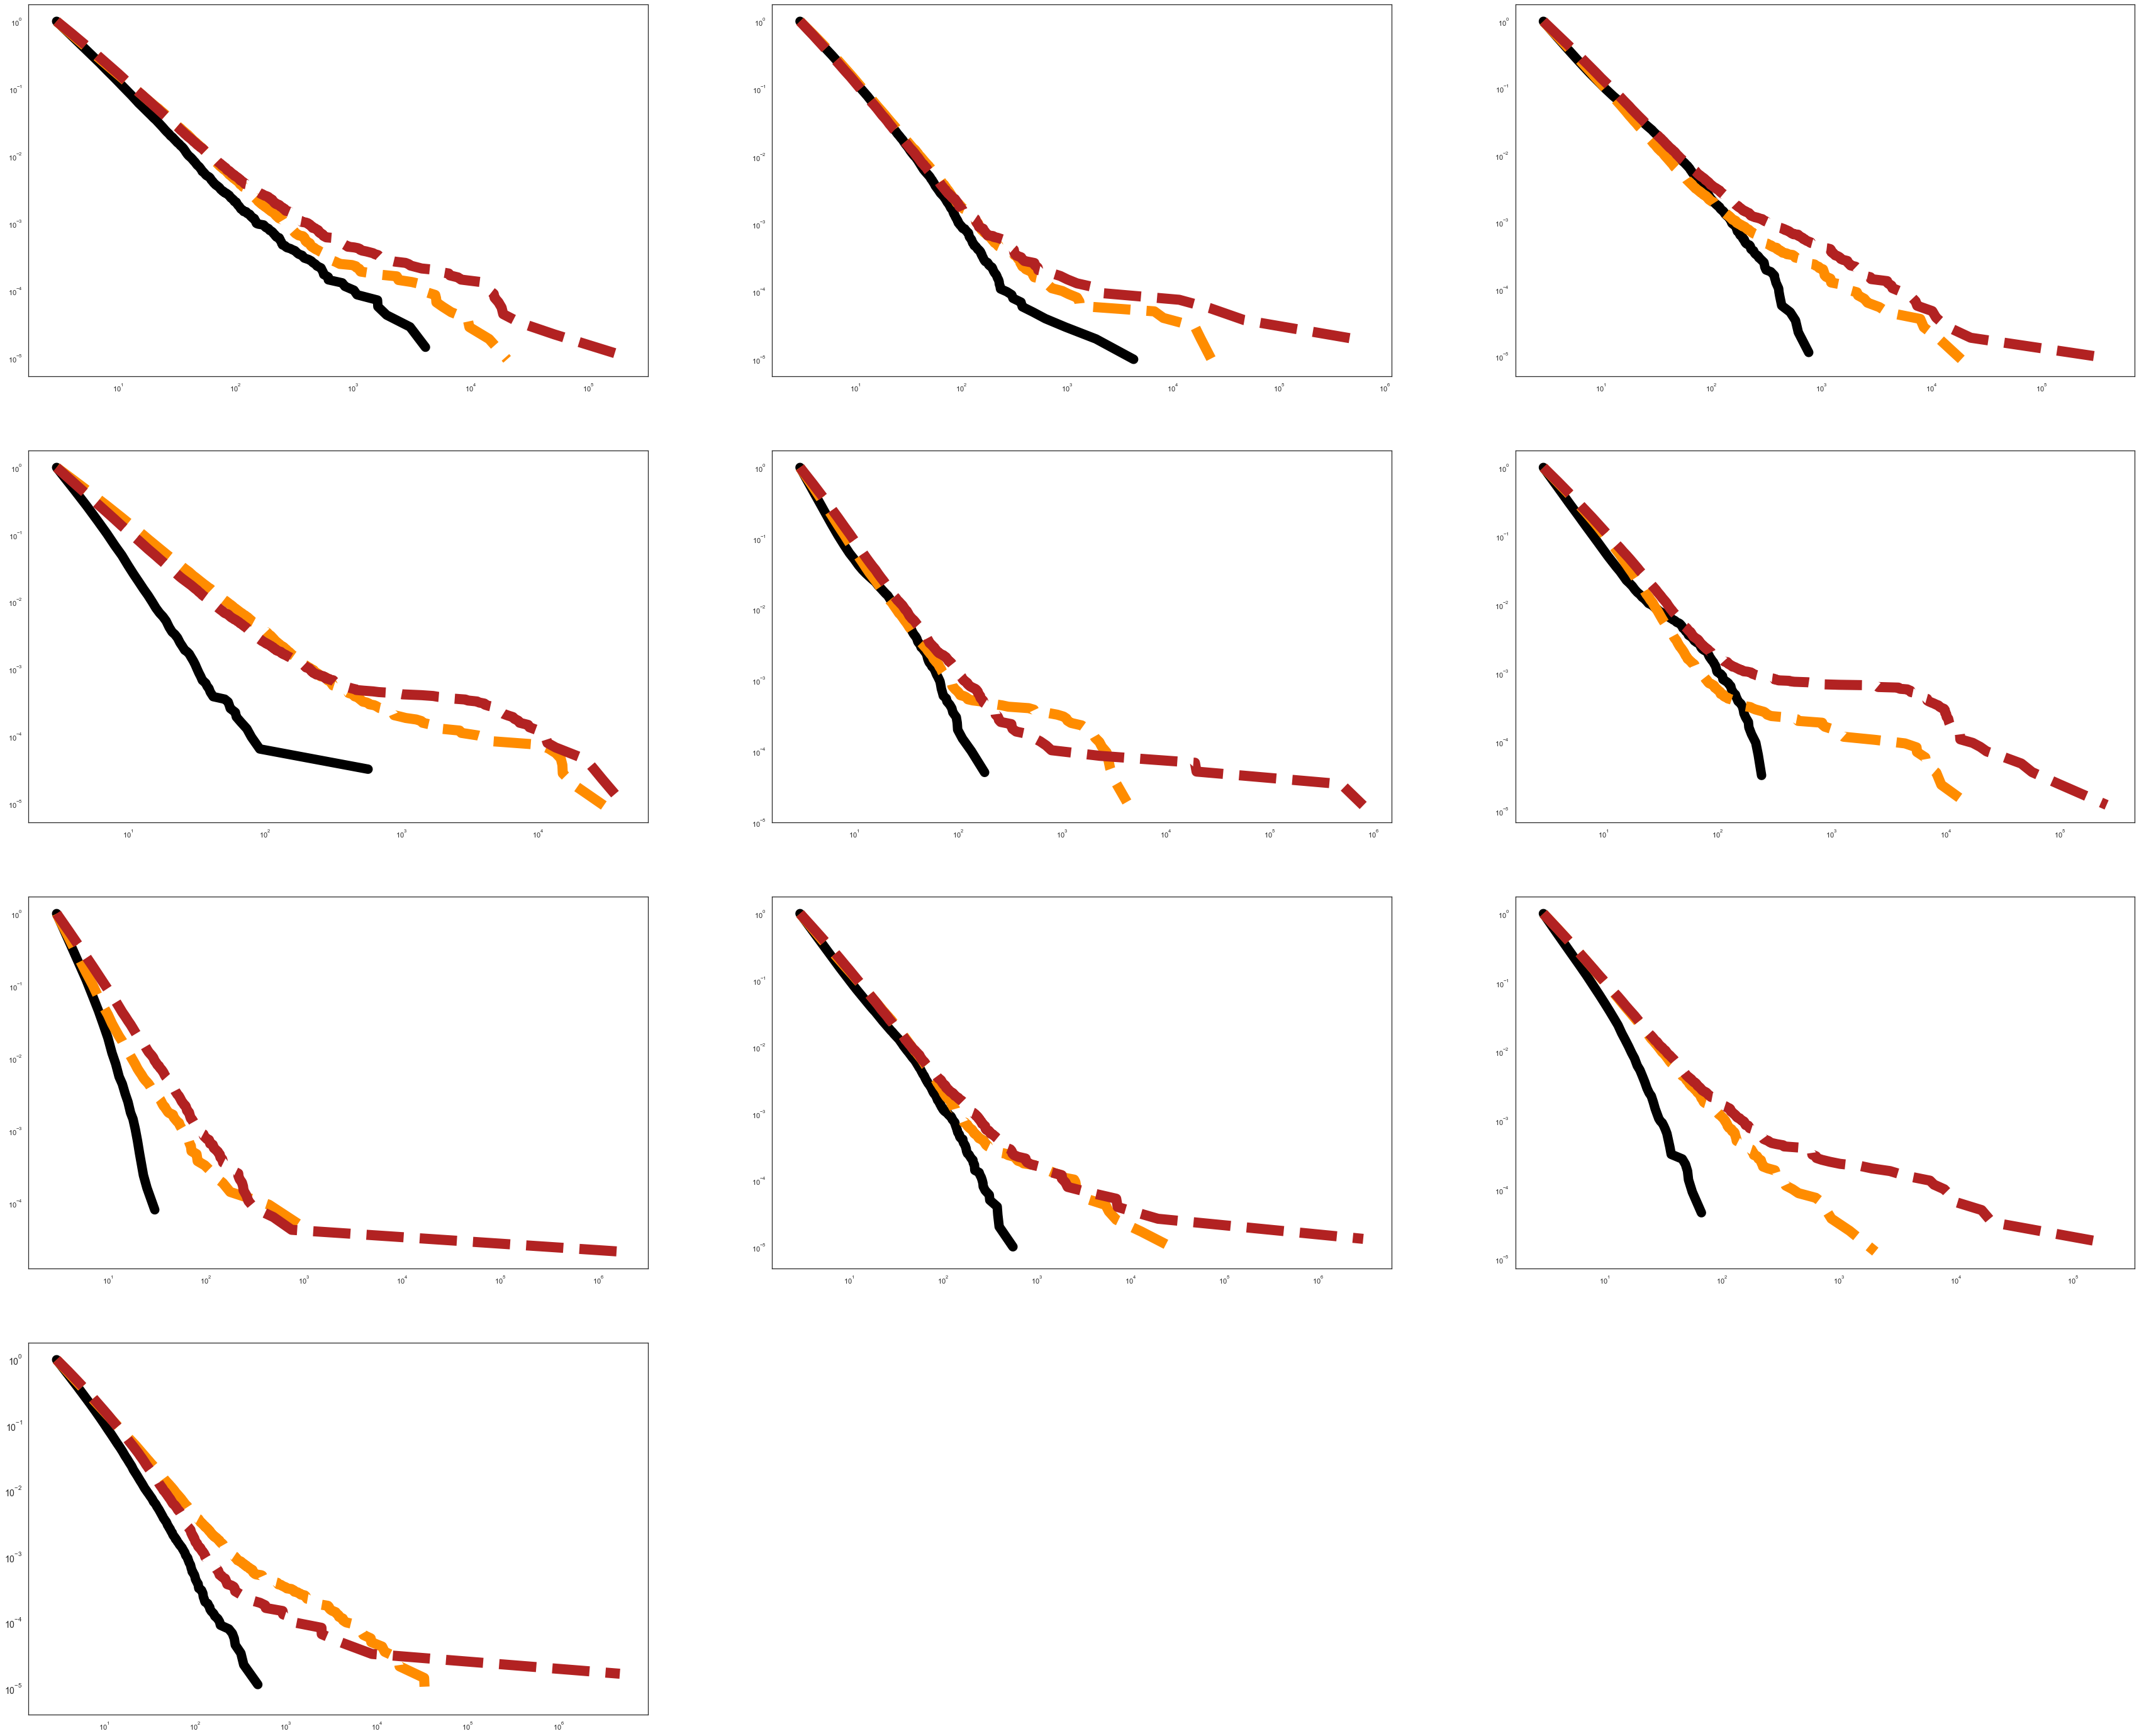

In [34]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','firebrick']
xlabels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$','10$^6$']
widths = [15, 16, 16]
lines = ['-', '--', '--']
count = 0
choose=0
fig = plt.figure(figsize=(60,50))
for i in num1:
    if i != '03':
        os.chdir(Fdata + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
        p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
        p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
        plotlist = [blnlist,p5list,p20list]
        ax = fig.add_subplot(4, 3, count+1)
        count+=1
        for e in range(len(plotlist)):
            avdistcut = np.load(plotlist[e][0])[choose]
            powerlaw.plot_ccdf(avdistcut, linestyle = lines[e],linewidth =widths[e] , markersize = 1, alpha = 1, c = colors[e])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
#axarr.set_ylabel('P(S)', size = '13')
#axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(xlabels, fontsize = 14)
plt.yticks(fontsize = 14)        
plt.show()

In [5]:
choose= 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p5_distlist = [np.load(p5list[i])[choose] for i in range(len(p5list))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p5_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    p5_vec = np.append(p5_vec, p5_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
tot_vec = []
full_list = [bln_vec, p5_vec, p20_vec]
for e in range(len(full_list)):
    tot_vec = np.append(tot_vec, full_list[e])
    
fig, axarr = plt.subplots(figsize = (7,5))
bln_histlist = list(range(len(bln_distlist)))
p5_histlist = list(range(len(bln_distlist)))
p20_histlist = list(range(len(bln_distlist)))

mini = np.min(tot_vec)
maxi = np.max(tot_vec)
bins = 10000

for i in range(len(bln_distlist)):    
    bln_histlist[i] = axarr.hist(bln_distlist[i], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[0]

for i in range(len(p5_distlist)):    
    p5_histlist[i] = axarr.hist(p5_distlist[i], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[0]

for i in range(len(p20_distlist)):    
    p20_histlist[i] = axarr.hist(p20_distlist[i], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[0]

yaxis = axarr.hist(bln_distlist[0], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[1][:bins]

plt.close(fig) 

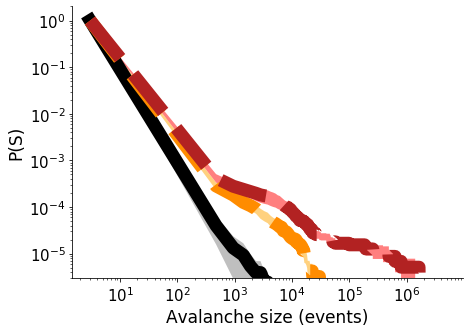

In [6]:
from scipy import stats
import matplotlib

fig, axarr = plt.subplots(figsize = (7,5))  

stop = 9
xaxis = np.mean(bln_histlist, axis= 0)
sem = stats.sem(bln_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='grey',alpha=0.5,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'k', linewidth = 13)

stop = 50
xaxis = np.mean(p5_histlist, axis= 0)
sem = stats.sem(p5_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0.
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='orange',alpha=0.5,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'darkorange', linewidth = 13, linestyle= '--')

stop = 3000
xaxis = np.mean(p20_histlist, axis= 0)
sem = stats.sem(p20_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus, facecolor='red',alpha=0.5,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'firebrick', linewidth = 13, linestyle = '--')


axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
#plt.xlim(right = 1000000)  
plt.ylim(bottom = 0.000003)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

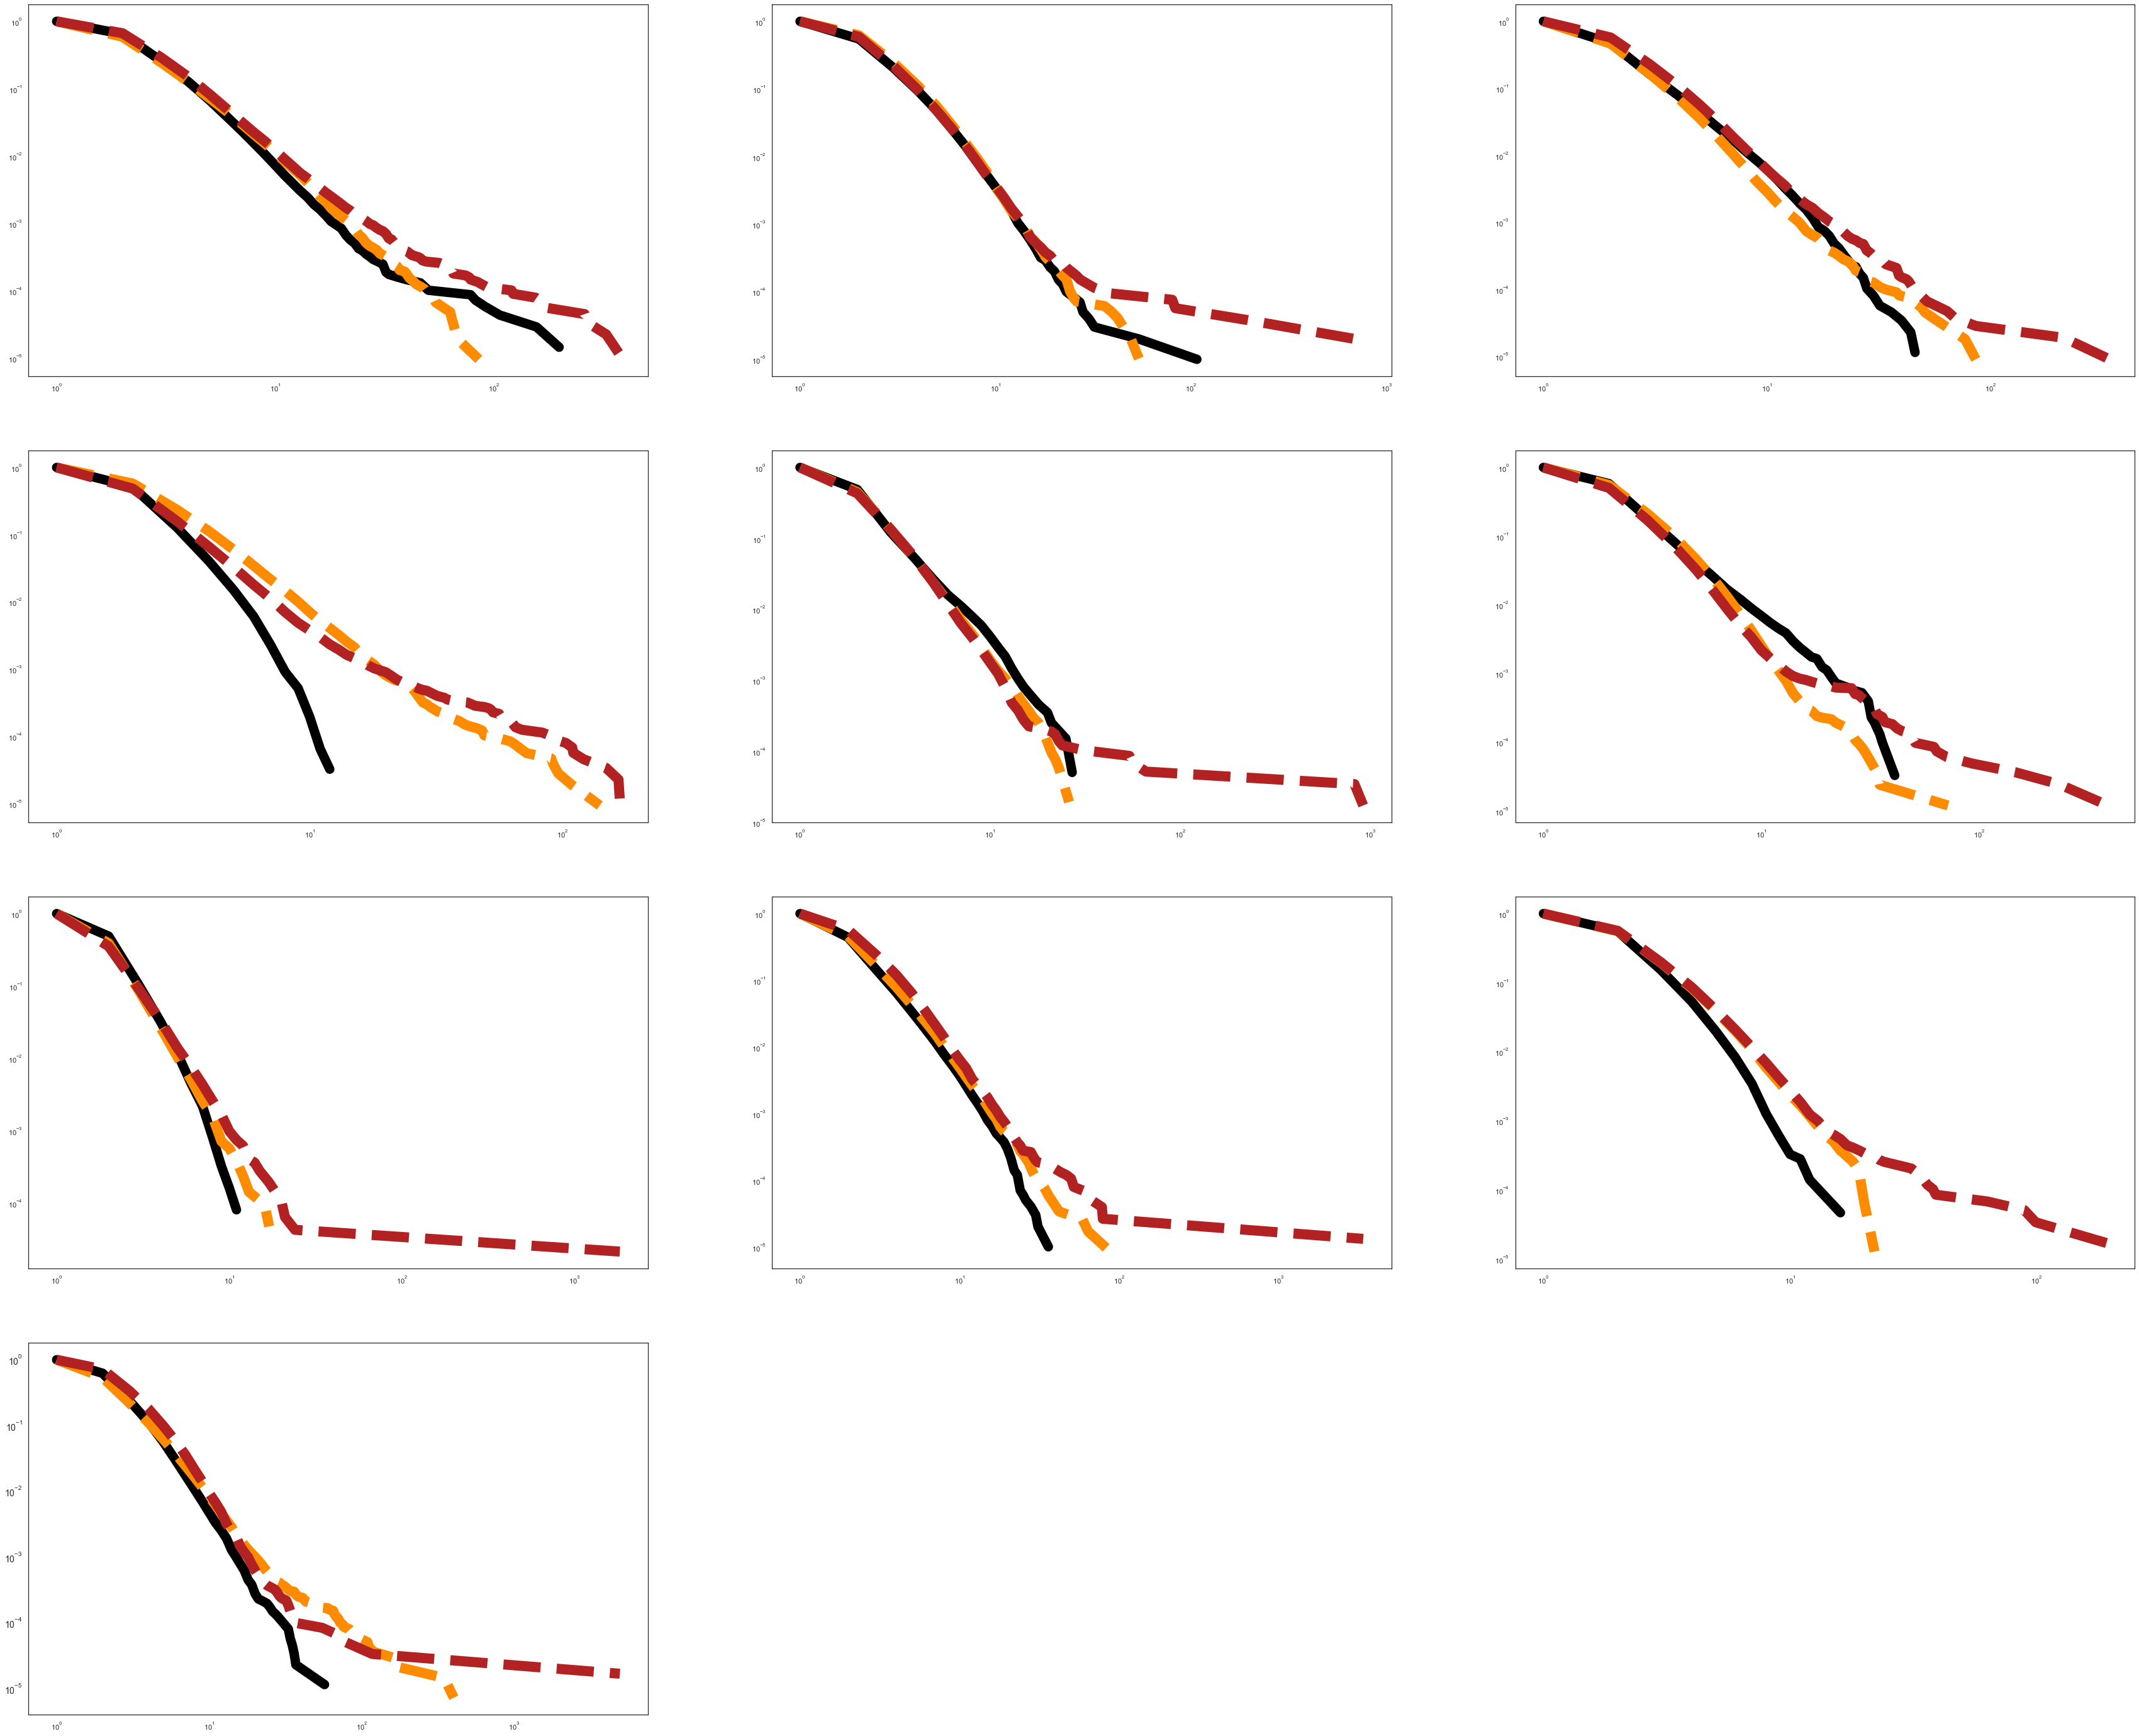

In [35]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','firebrick']
xlabels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$','10$^6$']
widths = [15, 16, 16]
lines = ['-', '--', '--']
count = 0
choose=1
fig = plt.figure(figsize=(60,50))
for i in num1:
    if i != '03':
        os.chdir(Fdata + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
        p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
        p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
        plotlist = [blnlist,p5list,p20list]
        ax = fig.add_subplot(4, 3, count+1)
        count+=1
        for e in range(len(plotlist)):
            avdistcut = np.load(plotlist[e][0])[choose]
            powerlaw.plot_ccdf(avdistcut, linestyle = lines[e],linewidth =widths[e] , markersize = 1, alpha = 1, c = colors[e])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
#axarr.set_ylabel('P(S)', size = '13')
#axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(xlabels, fontsize = 14)
plt.yticks(fontsize = 14)        
plt.show()

In [7]:
choose= 1
bln_distlist = [(1/2.73)*np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p5_distlist = [(1/2.73)*np.load(p5list[i])[choose] for i in range(len(p5list))]
p20_distlist = [(1/2.73)*np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p5_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    p5_vec = np.append(p5_vec, p5_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
tot_vec = []
full_list = [bln_vec, p5_vec, p20_vec]
for e in range(len(full_list)):
    tot_vec = np.append(tot_vec, full_list[e])
    
fig, axarr = plt.subplots(figsize = (7,5))
bln_histlist = list(range(len(bln_distlist)))
p5_histlist = list(range(len(bln_distlist)))
p20_histlist = list(range(len(bln_distlist)))

mini = np.min(tot_vec)
maxi = np.max(tot_vec)
bins = 1000

for i in range(len(bln_distlist)):    
    bln_histlist[i] = axarr.hist(bln_distlist[i], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[0]

for i in range(len(p5_distlist)):    
    p5_histlist[i] = axarr.hist(p5_distlist[i], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[0]

for i in range(len(p20_distlist)):    
    p20_histlist[i] = axarr.hist(p20_distlist[i], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[0]

yaxis = axarr.hist(bln_distlist[0], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[1][:bins]

plt.close(fig) 

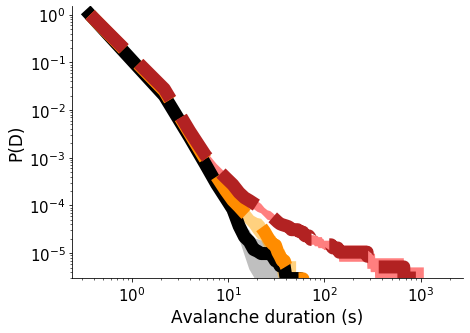

In [8]:
from scipy import stats
import matplotlib

fig, axarr = plt.subplots(figsize = (7,5))  

stop = 22
xaxis = np.mean(bln_histlist, axis= 0)
sem = stats.sem(bln_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='grey',alpha=0.5,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'k', linewidth = 13)


stop = 29
xaxis = np.mean(p5_histlist, axis= 0)
sem = stats.sem(p5_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0.
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='orange',alpha=0.5,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'darkorange', linewidth = 13, linestyle= '--')

stop = 600
xaxis = np.mean(p20_histlist, axis= 0)
sem = stats.sem(p20_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus, facecolor='red',alpha=0.5,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'firebrick', linewidth = 13, linestyle = '--')

axarr.set_xscale('log')
axarr.set_yscale('log')
plt.yticks(size = 15)
plt.xticks(size = 15)

#plt.xlim(right = 1000)  
plt.ylim(top = 1.5,bottom = 0.000003)  
axarr.set_ylabel('P(D)', size = '17')
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'avdur_ptz_mean.svg', transparent = True)
plt.show()

In [3]:
import glob
blnavlist = sorted(glob.glob('*bln*av*exponent.npy*'))
p5avlist = sorted(glob.glob('*PTZ05*av*exponent.npy*'))
p20avlist = sorted(glob.glob('*PTZ20*av*exponent.npy*'))
bln_exp = np.load(blnavlist[0])
p5_exp = np.load(p5avlist[0])
p20_exp = np.load(p20avlist[0])

IndexError: list index out of range

In [ ]:
#Calculate exponents

bln_exp, p5_exp, p20_exp = np.zeros((len(blnavlist),2)),np.zeros((len(blnavlist),2)),np.zeros((len(blnavlist),2))
for i in range(len(blnavlist)):
    bln = crfn.marglik_power_loglik(np.load(blnavlist[i]), 2000)
    p5 = crfn.marglik_power_loglik(np.load(p5avlist[i]), 2000)
    p20 = crfn.marglik_power_loglik(np.load(p20avlist[i]), 2000)

    bln_exp[i,0],bln_exp[i,1] = bln[0][0], bln[1][0]
    p5_exp[i,0],p5_exp[i,1] = p5[0][0], p5[1][0]
    p20_exp[i,0],p20_exp[i,1] = p20[0][0], p20[1][0]

    print('Done ' + str(i))

In [11]:
#SIZE - Exponent
exp = np.zeros((30))

bln_exp = np.append(np.load(blnavlist[0])[:,0][0],np.load(blnavlist[0])[:,0][2:])
p5_exp = np.append(np.load(p5avlist[0])[:,0][0],np.load(p5avlist[0])[:,0][2:])
p20_exp = np.append(np.load(p20avlist[0])[:,0][0],np.load(p20avlist[0])[:,0][2:])


avlist = [bln_exp, p5_exp, p20_exp]
fli = list(range(10))
flist=[]
for i in range(10):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

sizexdf = {}
count=0
for i in range(len(avlist)):
    for y in range(10):
        exp[count] = avlist[i][y]
        count+=1
sizexdf = pd.DataFrame({"Exponent":exp , "Labels":  np.append(adfn.repeat_list('Baseline',10),np.append(adfn.repeat_list('PTZ 5mM',10),adfn.repeat_list('PTZ 20mM',10))), "Fish":flist})

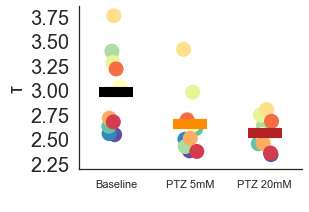

In [13]:
from matplotlib.collections import PathCollection
from matplotlib import cm
import seaborn as sns

sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="Exponent", data = sizexdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data=sizexdf, hue = 'Fish', palette = colors1, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('τ', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.savefig(Ffig + 'exp_size_ptz.svg', transparent = True)
plt.show()

In [14]:
bln_size = sizexdf[sizexdf['Labels'] == 'Baseline']
p5_size = sizexdf[sizexdf['Labels'] == 'PTZ 5mM']
p20_size = sizexdf[sizexdf['Labels'] == 'PTZ 20mM']

exp_list = bln_size, p5_size, p20_size

In [15]:
from scipy import stats
data = bln_size['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

2.9779459865185376 0.13274353749810144


In [16]:
from scipy import stats
data = p5_size['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

2.6490221124674878 0.10232852424142291


In [17]:
from scipy import stats
data = p20_size['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

2.5550295204977638 0.04991228233032427


In [18]:
for i in range(len(exp_list)):
    p = stats.normaltest(exp_list[i]['Exponent'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [19]:
from scipy.stats import wilcoxon
alpha = 0.05/3

w, p = wilcoxon(bln_size['Exponent'], p5_size['Exponent'], mode='auto')
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 0.0   p = 0.001953125
Samples are significantly different


In [20]:
#BLN - PTZ20
alpha = 0.05/3

t, p = stats.ttest_rel(bln_size['Exponent'], p20_size['Exponent'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 4.589020039183812   p = 0.0013108571297495517
Samples are significantly different


In [21]:
from scipy.stats import wilcoxon
alpha = 0.05/3

w, p = wilcoxon(p5_size['Exponent'], p20_size['Exponent'], mode='auto')
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 13.0   p = 0.16015625
Samples are the same


In [22]:
#Duration exponent
exp = np.zeros((30))

bln_exp = np.append(np.load(blnavlist[0])[:,1][0],np.load(blnavlist[0])[:,1][2:])
p5_exp = np.append(np.load(p5avlist[0])[:,1][0],np.load(p5avlist[0])[:,1][2:])
p20_exp = np.append(np.load(p20avlist[0])[:,1][0],np.load(p20avlist[0])[:,1][2:])


avlist = [bln_exp, p5_exp, p20_exp]
fli = list(range(10))
flist=[]
for i in range(10):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

durexdf = {}
count=0
for i in range(len(avlist)):
    for y in range(10):
        exp[count] = avlist[i][y]
        count+=1
durexdf = pd.DataFrame({"Exponent":exp , "Labels":  np.append(adfn.repeat_list('Baseline',10),np.append(adfn.repeat_list('PTZ 5mM',10),adfn.repeat_list('PTZ 20mM',10))), "Fish":flist})

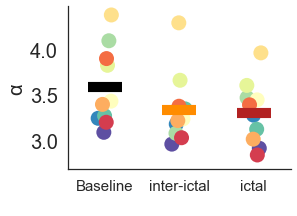

In [23]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']
fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="Exponent", data = durexdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=durexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data=durexdf, hue = 'Fish', palette = colors1, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '20')
plt.yticks(size = 20)
ax.set_xticklabels(['Baseline', 'inter-ictal', 'ictal'], size = 15)
ax.legend_.remove()
#plt.savefig(Ffig + 'exp_dur_ptz.svg', transparent = True)
plt.show()

In [24]:
bln_dur = durexdf[durexdf['Labels'] == 'Baseline']
p5_dur = durexdf[durexdf['Labels'] == 'PTZ 5mM']
p20_dur = durexdf[durexdf['Labels'] == 'PTZ 20mM']

exp_list = bln_dur, p5_dur, p20_dur

In [25]:
from scipy import stats
data = bln_dur['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

3.5825245807181125 0.13798210981440143


In [26]:
from scipy import stats
data = p5_dur['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

3.3374271761125427 0.12338381449081703


In [27]:
from scipy import stats
data = p20_dur['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

3.3039589597266654 0.10860921996153089


In [28]:
for i in range(len(exp_list)):
    p = stats.normaltest(exp_list[i]['Exponent'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [29]:
from scipy.stats import wilcoxon
alpha = 0.05/3

w, p = wilcoxon(bln_dur['Exponent'], p5_dur['Exponent'], mode='auto')
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 2.0   p = 0.005859375
Samples are significantly different


In [30]:
#BLN - PTZ20
alpha = 0.05/3

t, p = stats.ttest_rel(bln_dur['Exponent'], p20_dur['Exponent'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 4.057204891142796   p = 0.0028538918279925013
Samples are significantly different


In [31]:
#BLN - PTZ20
alpha = 0.05/3

t, p = stats.ttest_rel(p5_dur['Exponent'], p20_dur['Exponent'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 0.4806566738137171   p = 0.642229014308055
Samples are the same


# Exponent relation

In [70]:
# Create datalists
#---------------------------------------------------------------------------
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p5list = sorted(glob.glob('*PTZ05*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))
bln_dcc = sorted(glob.glob('*BLN*DCC.npy*')) 
p5_dcc = sorted(glob.glob('*_PTZ05*DCC.npy*')) 
p20_dcc = sorted(glob.glob('*_PTZ20*DCC.npy*')) 
blnlist, p5list, p20list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-09_2photon_

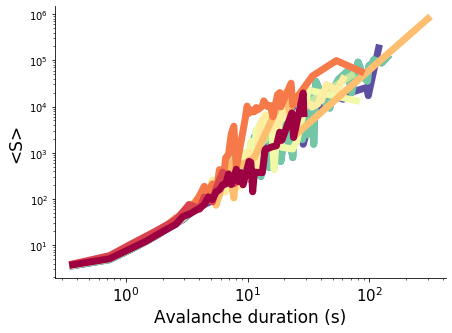

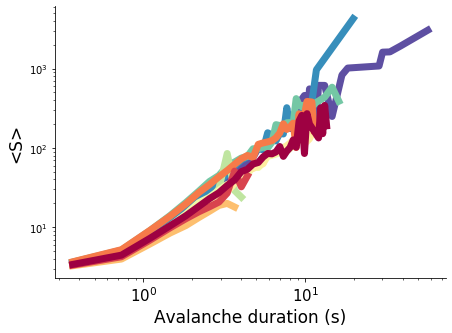

In [54]:
fig, axarr = plt.subplots(figsize = (7,5))
import matplotlib
from matplotlib import cm
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$']


sizelist, durlist = list(range(len(blnlist))),list(range(len(blnlist)))

for i in range(len(blnlist)):    
    avsize = np.load(p20list[i])[0]
    avdur = (1/2.73)*np.load(p20list[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_ylabel('<S>', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

axarr.set_xticklabels(labels, size = 15)
#plt.ylim(top = 10000)  

#plt.savefig(Ffig + 'av_sizexdur.svg', transparent = True)
plt.show()

fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(blnlist)):    
    avsize = np.load(blnlist[i])[0]
    avdur = (1/2.73)*np.load(blnlist[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_ylabel('<S>', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

axarr.set_xticklabels(labels, size = 15)
#plt.ylim(top = 10000)  

#plt.savefig(Ffig + 'av_sizexdur.svg', transparent = True)
plt.show()

In [136]:
def prac(data):
    avsize = np.load(data)[0]
    avdur = (1/2.73)*np.load(data)[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    return(sizevec,durvec)

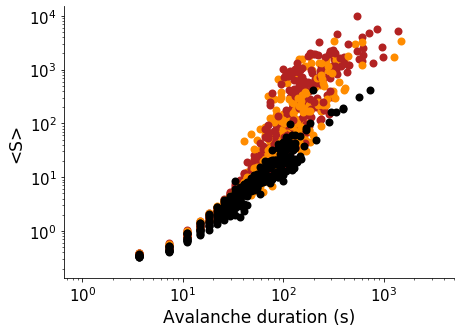

In [152]:
fig, axarr = plt.subplots(figsize = (7,5))
import matplotlib
from matplotlib import cm

labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$', '10$^3$','10$^4$','10$^5$']



for i in range(len(blnlist)):    
    yaxis, xaxis = prac(p5list[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 1, c = 'darkorange')
    yaxis, xaxis = prac(p20list[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 1, c = 'firebrick')

    axarr.set_xscale('log')
    axarr.set_yscale('log')
    
for i in range(len(blnlist)):    
    yaxis, xaxis = prac(blnlist[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 1, c = 'k')
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    
    
    
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_ylabel('<S>', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

axarr.set_xticklabels(labels, size = 15)
axarr.set_yticklabels(labels, size = 15)
plt.xlim(right = 500) 
plt.ylim(top = 150000)  


plt.savefig(Ffig + 'av_sizexdur_seizure.svg', transparent = True)
plt.show()

In [157]:
blnlist, p5list, p20list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-09_2photon_

In [4]:
bln_exp_v = 1.554566028813407, 1.649027875220253, 1.4873981251648003, 1.1494745363352408, 1.2378545192432928, 1.3100708711952154,  0.8780780142046153,  1.3855132266402814,1.1193083435073103
p5_exp_v = 1.8536392608406973, 2.261157103857065, 1.9494617620884926, 1.9814246080616615,  2.26402691161244, 2.41952018128139,  1.3791020103573581, 1.8827592213359152, 1.6299244074053212
p20_exp_v = 1.9566261793242286,  2.0703172818092987, 1.9750162835260723, 2.15114835356275, 2.035279295734585, 2.4838635716232305, 1.506341295697262, 1.9097472832944193,2.3059128889917937

In [26]:
dcc = np.zeros((27))
dcc_list = [bln_exp_v, p5_exp_v, p20_exp_v]
fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)
    
count=0
for i in range(len(dcc_list)):
    for y in range(9):
        dcc[count] = dcc_list[i][y]
        count+=1
dcc_df = pd.DataFrame({"exponent":dcc , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('PTZ 5mM',9),adfn.repeat_list('PTZ 20mM',9))), "Fish":flist})

In [25]:
len(bln_exp_v)

9

In [27]:
dcc_df

,exponent,Labels,Fish
0,1.554566,Baseline,F2
1,1.649028,Baseline,F3
2,1.487398,Baseline,F4
3,1.149475,Baseline,F5
4,1.237855,Baseline,F6
5,1.310071,Baseline,F7
6,0.878078,Baseline,F8
7,1.385513,Baseline,F9
8,1.119308,Baseline,F10
9,1.853639,PTZ 5mM,F2


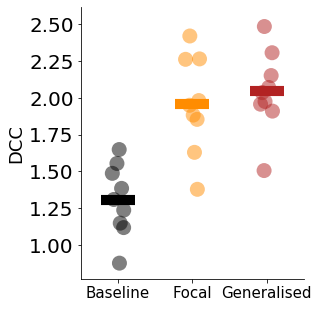

In [33]:

from matplotlib.collections import PathCollection
import seaborn as sns
from matplotlib import cm
colors2 = ['black','darkorange','firebrick']
fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="exponent", data = dcc_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="DCC", data=dcc_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="exponent", data=dcc_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)
plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('DCC', size = '18')
ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + '1ovz_ptz.svg', transparent = True)
plt.show()

In [34]:
from scipy import stats
data = bln_exp_v
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

from scipy import stats
data = p5_exp_v
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

from scipy import stats
data = p20_exp_v
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.3079212822582684 0.08043106130225984
1.9578906074267044 0.10919451932022595
2.0438058259515155 0.09081582517338248


In [37]:
dcc_list[0]

(1.554566028813407,
 1.649027875220253,
 1.4873981251648003,
 1.1494745363352408,
 1.2378545192432928,
 1.3100708711952154,
 0.8780780142046153,
 1.3855132266402814,
 1.1193083435073103)

In [38]:
for i in range(len(dcc_list)):
    p = stats.normaltest(dcc_list[i])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


In [39]:
alpha = 0.05/2

t, p = stats.ttest_rel(bln_exp_v, p5_exp_v)
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')
    
t, p = stats.ttest_rel(bln_exp_v, p20_exp_v)
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')


t = -7.058189576719913   p = 0.0001063020007473678
Samples are significantly different
t = -6.990979548133665   p = 0.00011365776663233178
Samples are significantly different


In [153]:
gamma_v, bln_exp_v = [0]*len(blnlist),[0]*len(blnlist)
for i in range(len(blnlist)):
    bln_exp_v[i],gamma_v[i],p = crfn.DCC(np.load(blnlist[i]))

In [158]:
gamma_v, p5_exp_v = [0]*len(blnlist),[0]*len(blnlist)
for i in range(len(blnlist)):
    p5_exp_v[i],gamma_v[i],p = crfn.DCC(np.load(p5list[i]))

In [ ]:
p20_exp,_,__ = crfn.DCC(np.load(p20list[-1]))

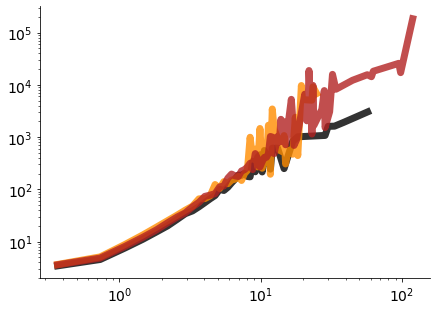

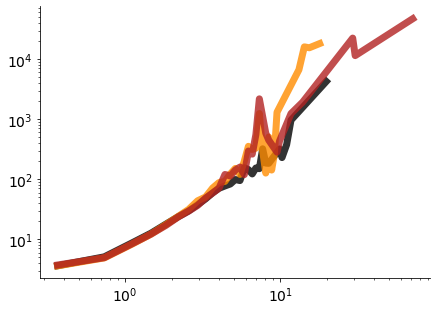

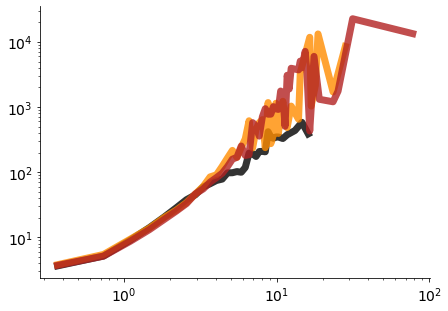

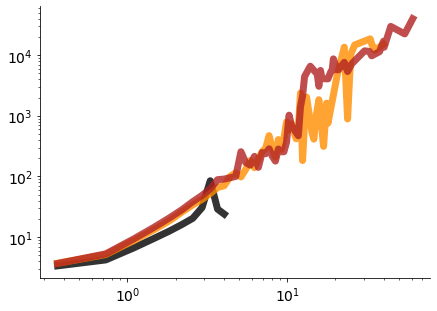

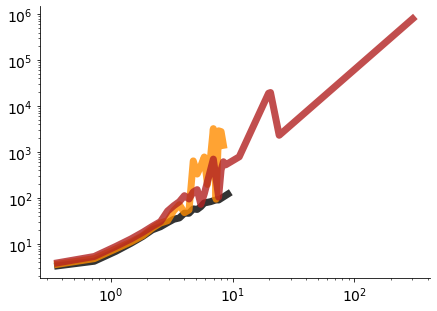

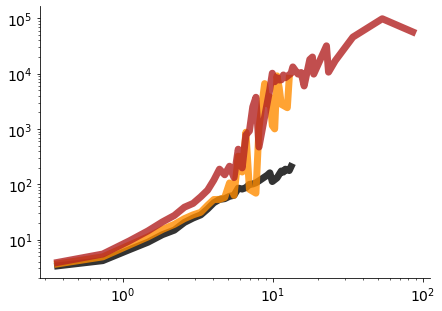

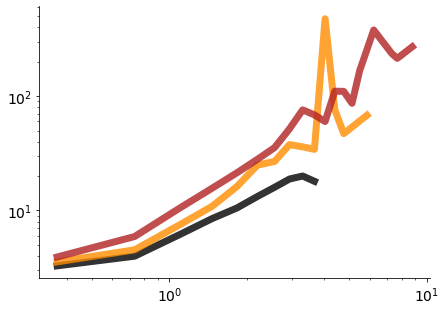

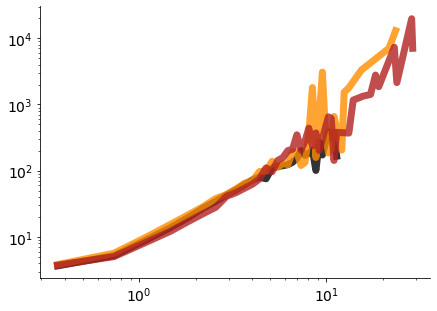

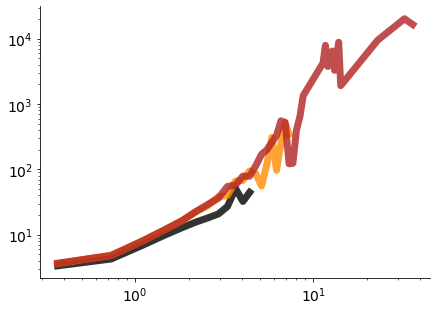

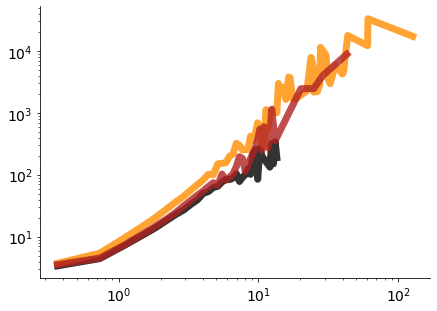

In [51]:

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','firebrick']
labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$']
widths = [7, 7, 7]
lines = ['-', '-', '-']

for i in num1:
    
    if i != '03':
        fig, axarr = plt.subplots(figsize = (7,5))

        os.chdir(Fdata + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
        p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
        p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
        plotlist = [blnlist,p5list,p20list]
        for e in range(len(plotlist)):
            avsize = np.load(plotlist[e][0])[0]
            avdur = (1/2.73)*np.load(plotlist[e][0])[1]
            sizevec, durvec = [],[]
            for x in np.unique(avdur):
                sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == x)]))  
                durvec = np.append(durvec, x)

            xaxis = np.unique(durvec)
            yaxis = sizevec
            axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], linestyle = lines[e], linewidth = widths[e], alpha = 0.8, c = colors[e])
            
            axarr.set_xscale('log')
            axarr.set_yscale('log')
            axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
            #plt.xlim(right = 1000000)  
            #plt.ylim(bottom = 0.000005)  
            #axarr.set_title(str(blnlist[0]), size = '13')
            #axarr.set_ylabel('P(S)', size = '13')
            #axarr.set_xlabel('Avalanche size (events)', size = '13')
            axarr.spines['top'].set_visible(False)
            axarr.spines['right'].set_visible(False)
        axarr.set_xticklabels(labels, size = 14)

        plt.yticks(fontsize = 14)       
        plt.savefig(Ffig + 'av_sizexdur' + i + '.svg', transparent = True)

        plt.show()

In [39]:
e

20.879120879120876

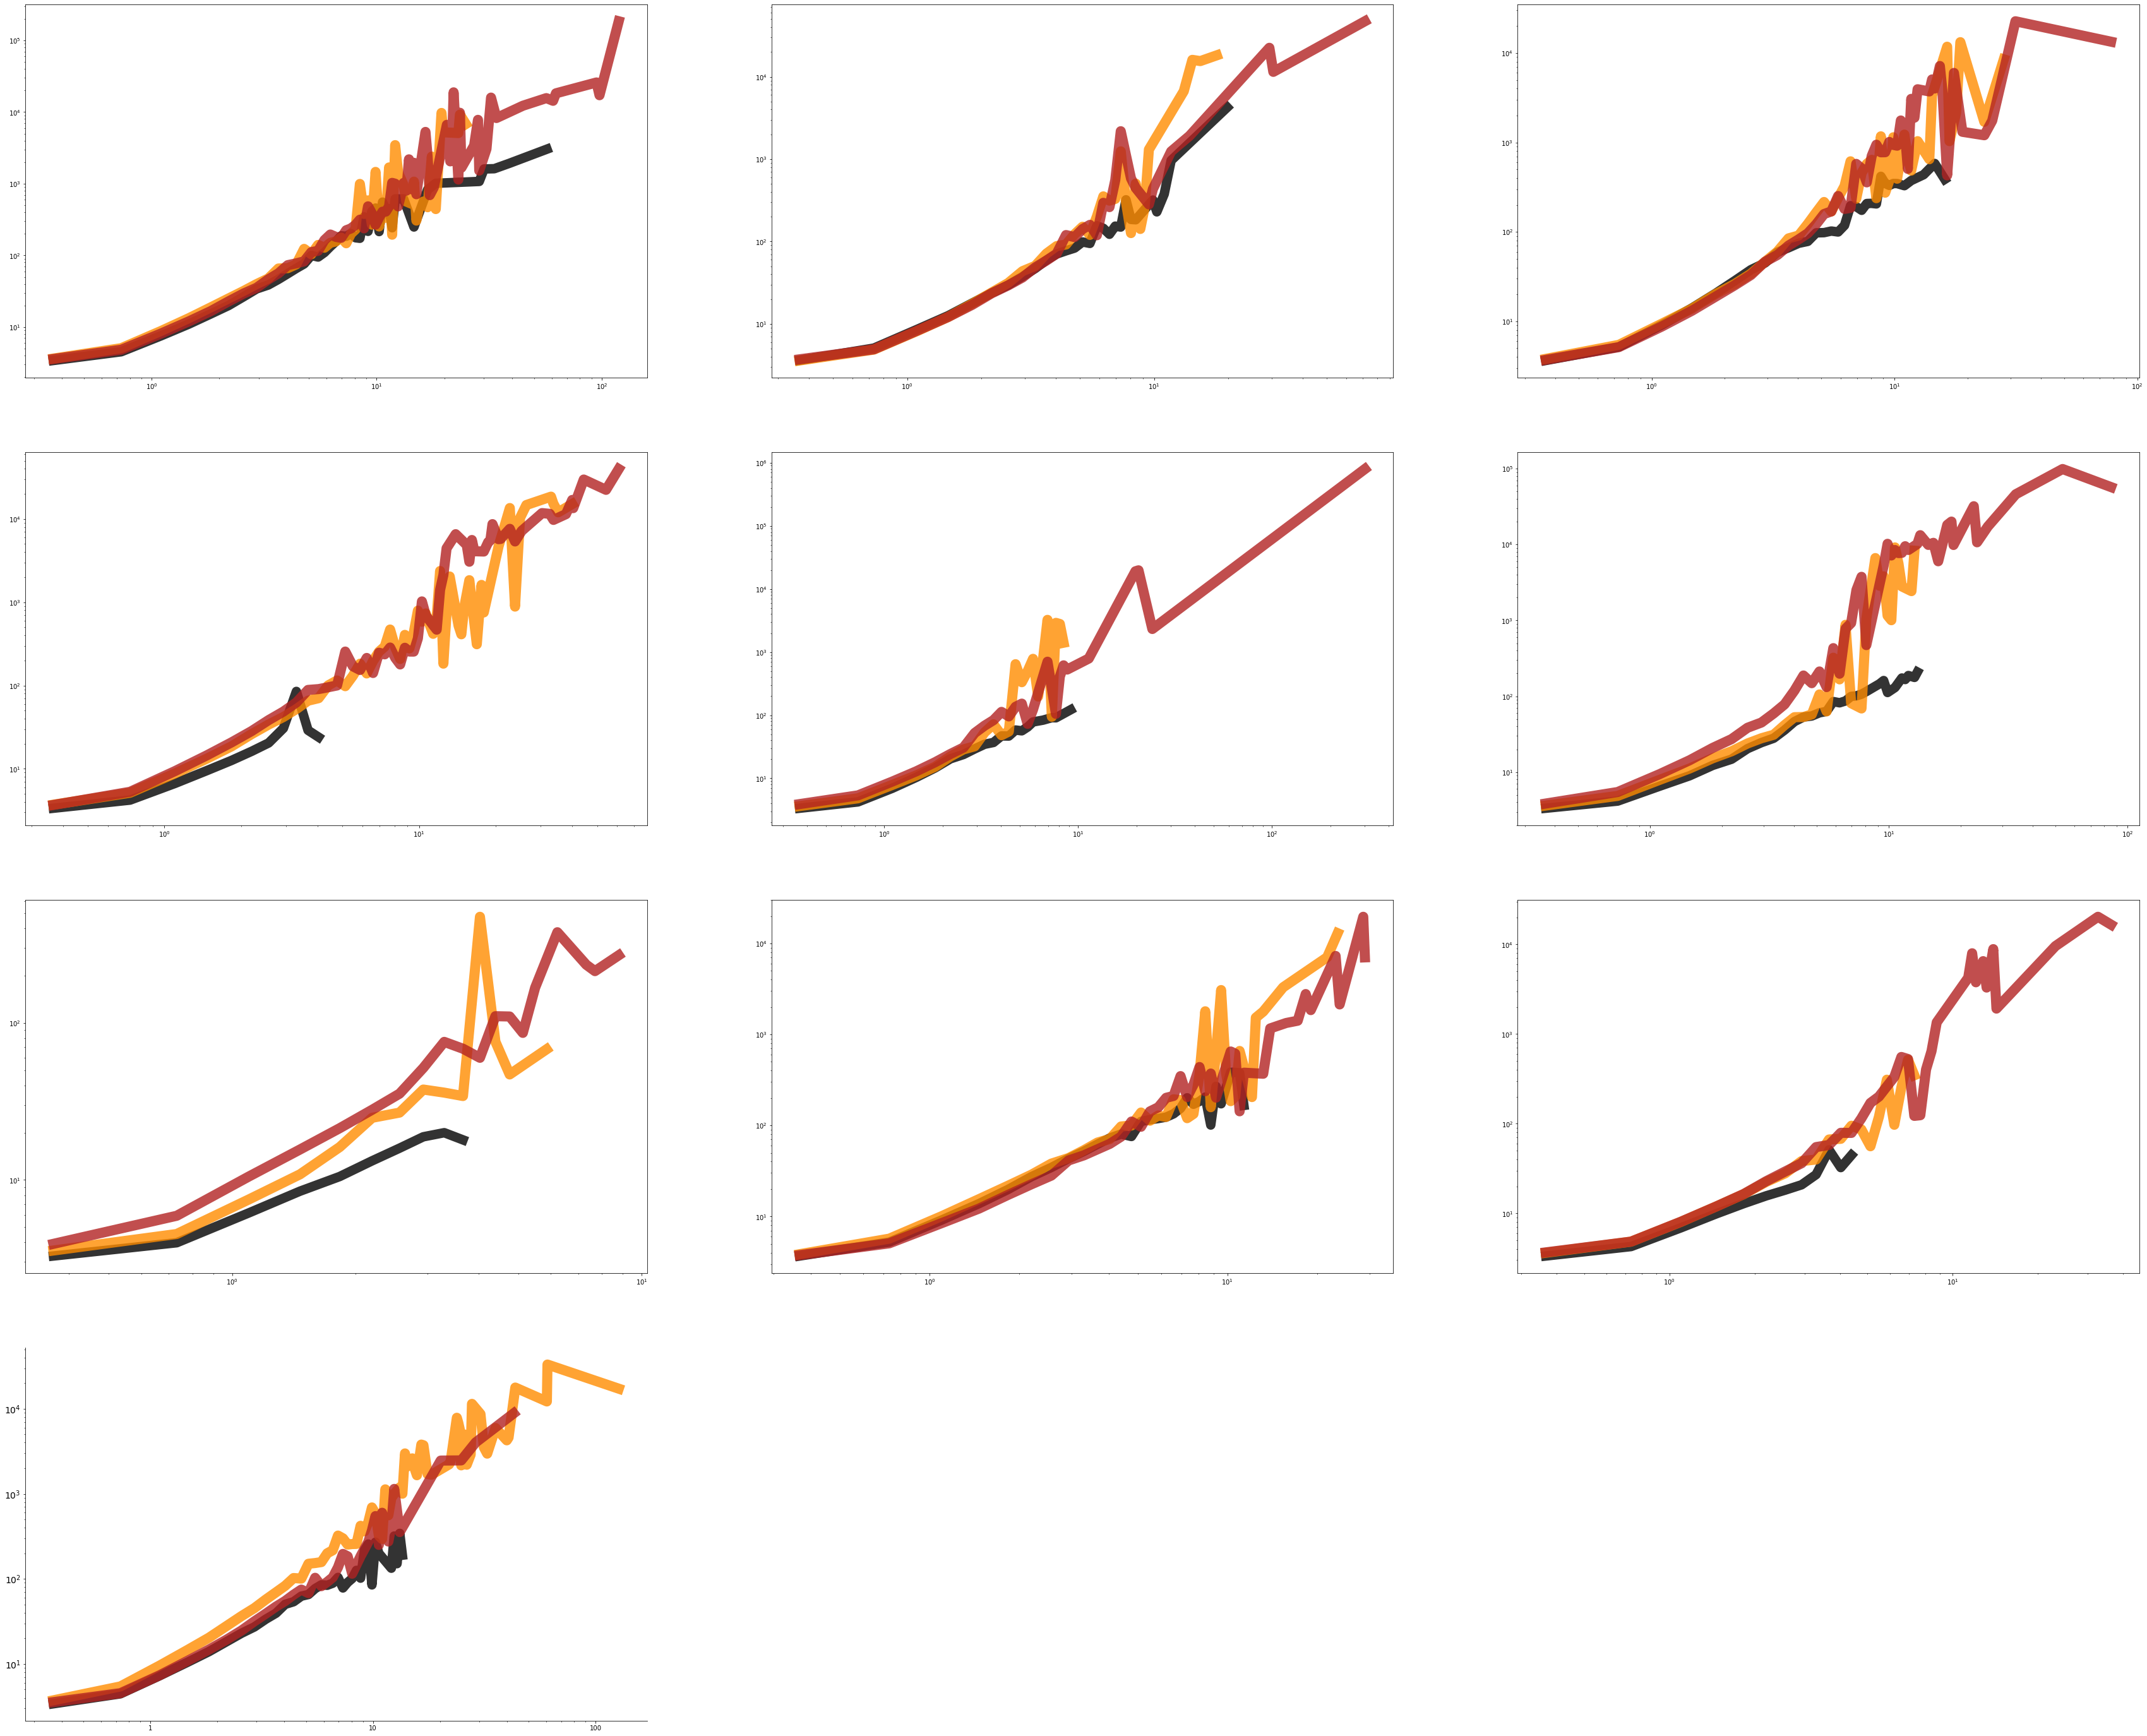

In [36]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','firebrick']
#xlabels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$','10$^6$']
widths = [15, 16, 16]
lines = ['-', '-', '-']
count = 0
choose=1
fig = plt.figure(figsize=(60,50))
for i in num1:
    if i != '03':
        os.chdir(Fdata + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
        p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
        p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
        plotlist = [blnlist,p5list,p20list]
        axarr = fig.add_subplot(4, 3, count+1)
        count+=1
        for e in range(len(plotlist)):
            avsize = np.load(plotlist[e][0])[0]
            avdur = (1/2.73)*np.load(plotlist[e][0])[1]
            sizevec, durvec = [],[]
            for x in np.unique(avdur):
                sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == x)]))  
                durvec = np.append(durvec, x)

            xaxis = np.unique(durvec)
            yaxis = sizevec
            axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], linestyle = lines[e], linewidth = widths[e], alpha = 0.8, c = colors[e])
            
            axarr.set_xscale('log')
            axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
#axarr.set_ylabel('P(S)', size = '13')
#axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#axarr.set_xticklabels(xlabels, fontsize = 14)
plt.yticks(fontsize = 14)        
plt.show()

In [37]:
dcc = np.zeros((30))
dcc_list = [bln_dcc, p5_dcc, p20_dcc]
fli = list(range(10))
flist=[]
for i in range(10):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)
    
count=0
for i in range(len(dcc_list)):
    for y in range(10):
        dcc[count] = np.load(dcc_list[i][y] ,allow_pickle=True)
        count+=1
dcc_df = pd.DataFrame({"DCC":dcc , "Labels":  np.append(adfn.repeat_list('Baseline',10),np.append(adfn.repeat_list('PTZ 5mM',10),adfn.repeat_list('PTZ 20mM',10))), "Fish":flist})

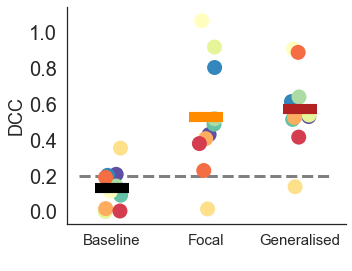

In [38]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']
fig, ax = plt.subplots(figsize = (5,4))
ax = sns.pointplot(x="Labels", y="DCC", data = dcc_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="DCC", data=dcc_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="DCC", data=dcc_df, hue = 'Fish', palette = colors1, size = 15, jitter = True ,alpha = 1)
plt.hlines(0.2, -0.35 ,2.35, linestyle = '--', color = 'grey', linewidth = 3, zorder = 1)
plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('DCC', size = '18')
ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.savefig(Ffig + 'DCC_ptz.svg', transparent = True)
plt.show()

In [39]:
bln_d = dcc_df[dcc_df['Labels'] == 'Baseline']
p5_d = dcc_df[dcc_df['Labels'] == 'PTZ 5mM']
p20_d = dcc_df[dcc_df['Labels'] == 'PTZ 20mM']

dcc_list = bln_d, p5_d, p20_d

In [40]:
from scipy import stats
data = bln_d['DCC']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

from scipy import stats
data = p5_d['DCC']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

from scipy import stats
data = p20_d['DCC']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.13226028743987198 0.03523868402311583
0.5236664610971633 0.10056043644143767
0.5694096022394319 0.06959627419084465


In [41]:
for i in range(len(dcc_list)):
    p = stats.normaltest(dcc_list[i]['DCC'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [42]:
alpha = 0.05/3

t, p = stats.ttest_rel(bln_d['DCC'], p5_d['DCC'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')
    
t, p = stats.ttest_rel(bln_d['DCC'], p20_d['DCC'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')
    
t, p = stats.ttest_rel(p5_d['DCC'], p20_d['DCC'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -3.2421947352744285   p = 0.010123029421069482
Samples are significantly different
t = -5.1474330452863795   p = 0.0006052191342034721
Samples are significantly different
t = -0.5304115670871465   p = 0.6086628155969493
Samples are the same


# Branching ratio

In [54]:
# Calculate BR in seizure transitions
#---------------------------------------------------------------------------
b_branchlist = sorted(glob.glob('*rand*branch*'))
pre_branchlist = sorted(glob.glob('*pre*branch*'))
p20_branchlist = sorted(glob.glob('*_ictal*branch*'))
branchlist = [b_branchlist, p20_branchlist]

branchlist

[['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_randbase-branch.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_ictal-branch.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_ictal-branch.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_ictal-branch.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_ictal-branch.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_i

In [55]:
#BRANCH RATIO
import pandas as pd

branch = np.zeros((18))
count=0
for i in range(len(branchlist)):
    for e in range(len(branchlist[i])):
        branch[count] = np.load(branchlist[i][e])
        count+=1

fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(2):
    flist = np.append(flist, fli)

bdf = pd.DataFrame({"Branching ratio":branch , "Labels":  np.append(adfn.repeat_list('Baseline',9),adfn.repeat_list('Ictal',9)), "Fish":flist})

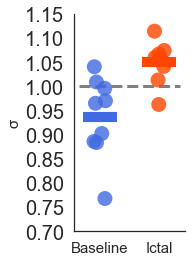

In [56]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
colors = ['royalblue', 'orangered']
fig, ax = plt.subplots(figsize = (2,4))
ax = sns.pointplot(x="Labels", y="Branching ratio", data = bdf, hue = 'Labels', palette = colors, join=True, ci=0, scale=5, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Branching ratio", data = bdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Branching ratio", data = bdf, hue = 'Labels', palette = colors, size = 15, jitter = True ,alpha = 0.8)
plt.hlines(1, -0.35 ,1.35, linestyle = '--', color = 'grey', linewidth = 3, zorder = 1)
plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '15')
ax.set_xticklabels(['Baseline', 'Ictal'], size = 15)
ax.legend_.remove()
#plt.savefig(Ffig + 'BR_ptz_trans.svg', transparent = True)
plt.ylim(0.7,1.15)
plt.show()

In [61]:
bln_br = bdf[bdf['Labels'] == 'Baseline']
p20_br = bdf[bdf['Labels'] == 'Ictal']

br_list = bln_br, p20_br

from scipy import stats
data = bln_br['Branching ratio']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)


data = p20_br['Branching ratio']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9355987907717268 0.028011230756108885
1.0496142280749823 0.014088490459070084


In [62]:
for i in range(len(br_list)):
    p = stats.normaltest(br_list[i]['Branching ratio'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


In [63]:
#BLN - SZ
alpha = 0.05/2

t, p = stats.ttest_rel(bln_br['Branching ratio'], p20_br['Branching ratio'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -3.413689122414859   p = 0.009173019577743528
Samples are significantly different


In [65]:
# Create datalists
#---------------------------------------------------------------------------
blnbranchlist = sorted(glob.glob('*BLN*_branch*'))
p5branchlist = sorted(glob.glob('*PTZ05*_branch*'))
p20branchlist = sorted(glob.glob('*PTZ20*_branch*'))
blnbranchlist, p5branchlist, p20branchlist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09__branch.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01__branch.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01__branch.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01__branch.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01__branch.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01__branch.npy',
  'PTZ-WILDTYP

In [66]:
#BRANCH RATIO
import pandas as pd
branchlist = blnbranchlist, p5branchlist, p20branchlist
branch = np.zeros((30))
count=0
for i in range(len(branchlist)):
    for e in range(len(branchlist[i])):
        branch[count] = np.load(branchlist[i][e])
        count+=1

fli = list(range(10))
flist=[]
for i in range(10):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

bdf = pd.DataFrame({"branch ratio":branch , "condition":  np.append(adfn.repeat_list('Baseline',10),np.append(adfn.repeat_list('5mM PTZ',10),adfn.repeat_list('20mM PTZ',10))), "Fish":flist})

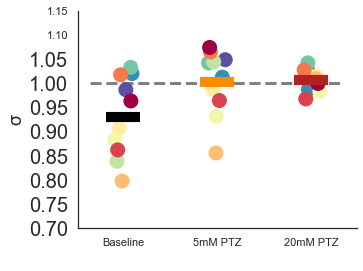

In [68]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,len(blnbranchlist)))
colors2 = ['black','darkorange','firebrick']
fig, ax = plt.subplots(figsize = (5,4))
ax = sns.pointplot(x="condition", y="branch ratio", data = bdf, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="condition", y="branch ratio", data=branchdf, color = 'k', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y="branch ratio", data=bdf, hue = 'Fish', palette = colors1, size = 15, jitter = True ,alpha = 1)
plt.hlines(1, -0.35 ,2.35, linestyle = '--', color = 'grey', linewidth = 3, zorder = 1)
plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '18')
ax.legend_.remove()
plt.ylim(0.7,1.15)
plt.savefig(Ffig + 'BR_full.svg', transparent = True)
plt.show()

In [71]:
bdf

,branch ratio,condition,Fish
0,0.986667,Baseline,F2
1,1.020179,Baseline,F3
2,1.033049,Baseline,F4
3,0.838542,Baseline,F5
4,0.883468,Baseline,F6
5,0.906975,Baseline,F7
6,0.797831,Baseline,F8
7,1.017794,Baseline,F9
8,0.862305,Baseline,F10
9,0.963513,Baseline,F11


In [72]:
bln_br = bdf[bdf['condition'] == 'Baseline']
p5_br = bdf[bdf['condition'] == '5mM PTZ']
p20_br = bdf[bdf['condition'] == '20mM PTZ']
br_list = bln_br, p5_br, p20_br

from scipy import stats
data = bln_br['branch ratio']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

data = p5_br['branch ratio']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

data = p20_br['branch ratio']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9310323831499296 0.026644529874785532
1.0026663977600674 0.021803372199152102
1.0076466835260107 0.007322923386211997


In [73]:
for i in range(len(br_list)):
    p = stats.normaltest(br_list[i]['branch ratio'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [74]:
#BLN - PTZ5
alpha = 0.05/3

t, p = stats.ttest_rel(bln_br['branch ratio'], p5_br['branch ratio'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -3.7930602572161547   p = 0.004262562729903708
Samples are significantly different


In [75]:
#BLN - PTZ5
alpha = 0.05/3

t, p = stats.ttest_rel(bln_br['branch ratio'], p20_br['branch ratio'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -3.1108233546761452   p = 0.012502247314211042
Samples are significantly different


In [76]:
#BLN - PTZ5
alpha = 0.05/3

t, p = stats.ttest_rel(p20_br['branch ratio'], p5_br['branch ratio'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 0.2506700714826363   p = 0.807698080083805
Samples are the same


In [2]:
# Calculate BR throughout seizure evolution
#---------------------------------------------------------------------------
sz_list = adfn.return_files(Fdata, 'PTZ-WILDTYPE','*PTZ20*_cutrealtrace.npy')
nnb_list = adfn.return_files(Fdata, 'PTZ-WILDTYPE','*PTZ20*0.16*nnb.npy')
bin_list = adfn.return_files(Fdata, 'PTZ-WILDTYPE','*PTZ20*59*bin*.npy')

sz_list, nnb_list, bin_list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
  'PTZ-WILD

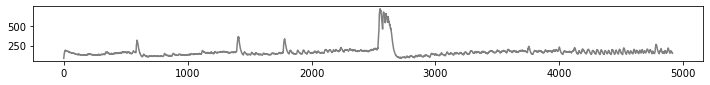

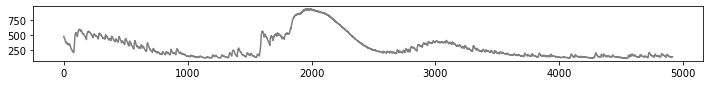

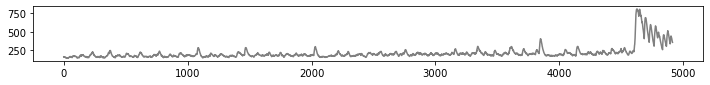

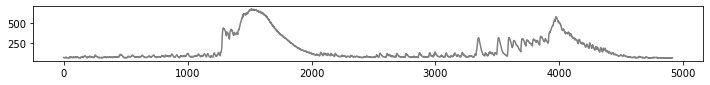

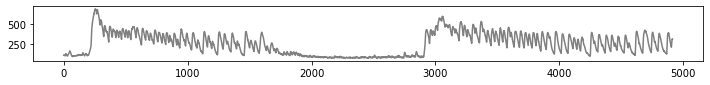

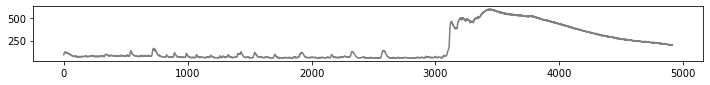

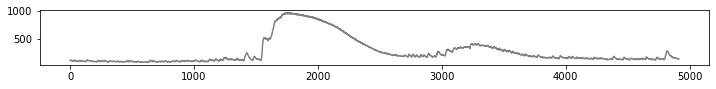

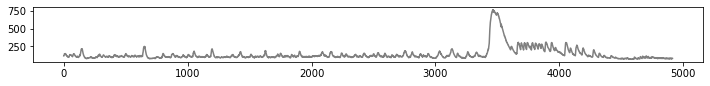

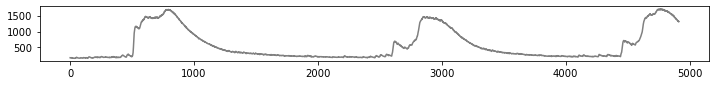

In [3]:
#Identify the beginning of generalised seizures - find traces with clear separation between generalised and pre=generalised
gen_list = []
sub_bin_list = []
sub_nnb_list = []
for o in range(len(sz_list)):
    p20 = np.load(sz_list[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    mini, maxi = np.min(mean), np.max(mean)
    #arbitrary threshold - max trace is 4x higher than min trace
    #only plot traces that fulfill this requirement
    if 4*mini < maxi: 
        fig, ax = plt.subplots(figsize= (12,1))  
        plt.plot(mean, c='grey')
        gen_list = np.append(gen_list, sz_list[o])
        sub_bin_list = np.append(sub_bin_list, bin_list[o])
        sub_nnb_list = np.append(sub_nnb_list, nnb_list[o])
        plt.show()


In [5]:
def br_evol(bind, nnb, start):
    br_list = list(range(100))
    curr_front = 0
    curr_end = 10
    for c in range(100):
        if c !=0:
            curr_front+=10
            curr_end+=10
        sub_bind = bind[:,start+curr_front:start+curr_end]
        av, pkg = crfn.avalanche(nnb, sub_bind)
        br = crfn.branch(pkg, av)
        br_list[c] = br
        #print(c)
    return(br_list)

In [6]:
sub_bin_list, gen_list

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_0.590_binarised.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_0.590_binarised.npy'],
       dtype='<U69'),
 array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-W

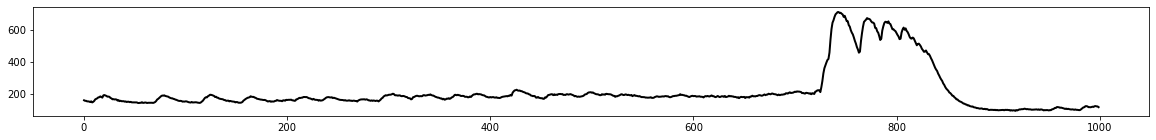

In [8]:
o = 0
p20 = np.load(gen_list[o])

bind = np.load(sub_bin_list[o])
nnb = np.load(nnb_list[o])

mean = np.apply_along_axis(np.mean, 0, p20)

fig, ax = plt.subplots(figsize= (20,2))  
start = 1810
stop = 1000
#plt.plot(mean, linewidth = 2, c= 'k')
#for x in np.arange(start, start+stop): plt.axvline(x=x, c='red',alpha = 0.05)

plt.plot(mean[start:start+stop], linewidth = 2, c= 'k')
plt.show()

br_l_1 = br_evol(bind, nnb, start)

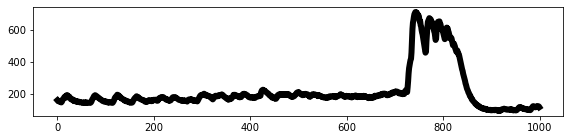

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


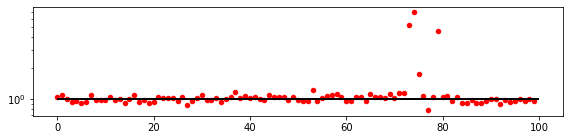

In [12]:
o = 0
p20 = np.load(gen_list[o])

bind = np.load(sub_bin_list[o])
nnb = np.load(nnb_list[o])

mean = np.apply_along_axis(np.mean, 0, p20)

fig, ax = plt.subplots(figsize= (9.5,2))  
start = 1810
stop = 1000

plt.plot(mean[start:start+stop], linewidth = 6, c= 'k')
plt.savefig(Ffig + 'mean_1.svg', transparent=True)
plt.show()


fig, ax = plt.subplots(figsize= (9.5,2))  
plt.scatter(np.arange(0,100), br_l_1, c='red', s = 20)
plt.hlines(1,0,100, linestyles='-', linewidth=2)
plt.yscale('log')
plt.savefig(Ffig + 'mean_1_BR.svg', transparent=True)
plt.ylim(0)
plt.show()

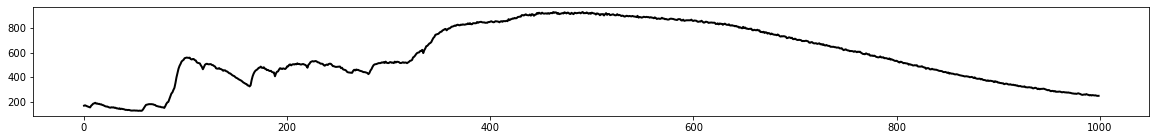

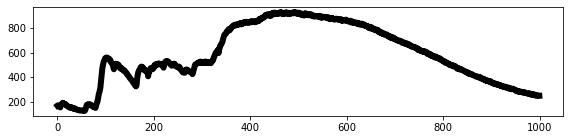

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


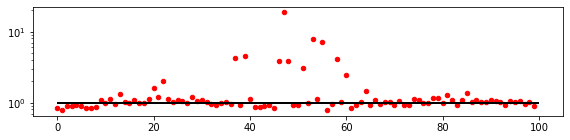

In [14]:
o = 1
p20 = np.load(gen_list[o])

bind = np.load(sub_bin_list[o])
nnb = np.load(nnb_list[o])


mean = np.apply_along_axis(np.mean, 0, p20)

fig, ax = plt.subplots(figsize= (20,2))  
start = 1500
stop = 1000
#plt.plot(mean, linewidth = 2, c= 'k')
#for x in np.arange(start, start+stop): plt.axvline(x=x, c='red',alpha = 0.05)

plt.plot(mean[start:start+stop], linewidth = 2, c= 'k')
plt.show()

br_l_2 = br_evol(bind, nnb, start)
fig, ax = plt.subplots(figsize= (9.5,2))  
plt.plot(mean[start:start+stop], linewidth = 6, c= 'k')
plt.savefig(Ffig + 'mean_2.svg', transparent=True)
plt.show()


fig, ax = plt.subplots(figsize= (9.5,2))  
plt.scatter(np.arange(0,100), br_l_2, c='red', s = 20)
plt.hlines(1,0,100, linestyles='-', linewidth=2)
plt.yscale('log')
plt.ylim(0)
plt.savefig(Ffig + 'mean_2_BR.svg', transparent=True)
plt.show()

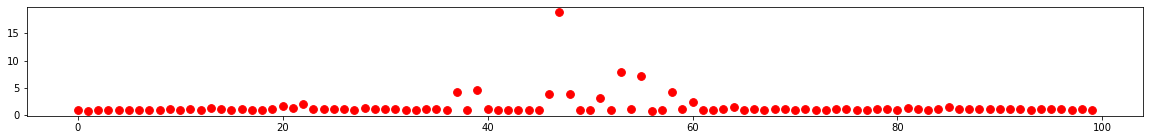

In [250]:
fig, ax = plt.subplots(figsize= (20,2))  
plt.scatter(np.arange(0,100), br_l_2, c='red', s = 60)
#plt.ylim(0.8, 1.3)
plt.show()

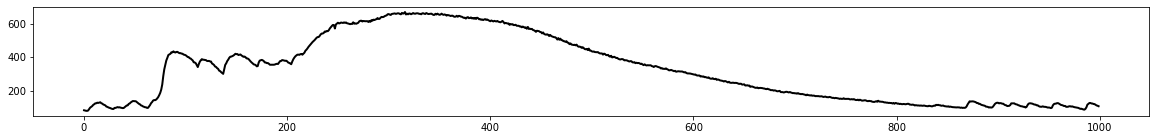

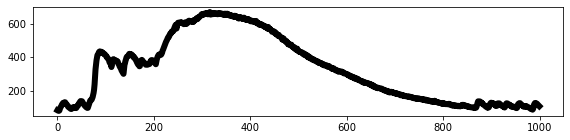

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


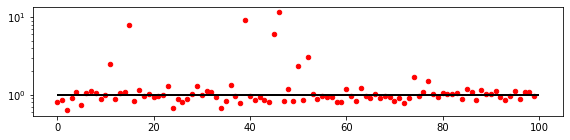

In [16]:
o = 3
p20 = np.load(gen_list[o])

bind = np.load(sub_bin_list[o])
nnb = np.load(sub_nnb_list[o])


mean = np.apply_along_axis(np.mean, 0, p20)

fig, ax = plt.subplots(figsize= (20,2))  
start = 1200
stop = 1000
#plt.plot(mean, linewidth = 2, c= 'k')
#for x in np.arange(start, start+stop): plt.axvline(x=x, c='red',alpha = 0.05)

plt.plot(mean[start:start+stop], linewidth = 2, c= 'k')
plt.show()

br_l_3 = br_evol(bind, nnb, start)

fig, ax = plt.subplots(figsize= (9.5,2))  
plt.plot(mean[start:start+stop], linewidth = 6, c= 'k')
plt.savefig(Ffig + 'mean_3.svg', transparent=True)
plt.show()


fig, ax = plt.subplots(figsize= (9.5,2))  
plt.scatter(np.arange(0,100), br_l_3, c='red', s = 20)
plt.hlines(1,0,100, linestyles='-', linewidth=2)
plt.yscale('log')
plt.ylim(0)
plt.savefig(Ffig + 'mean_3_BR.svg', transparent=True)
plt.show()

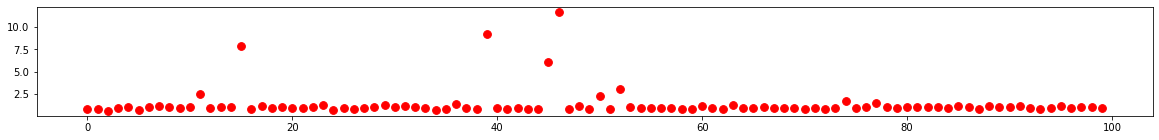

In [252]:
fig, ax = plt.subplots(figsize= (20,2))  
plt.scatter(np.arange(0,100), br_l_3, c='red', s = 60)
#plt.ylim(0.8, 1.3)
plt.show()

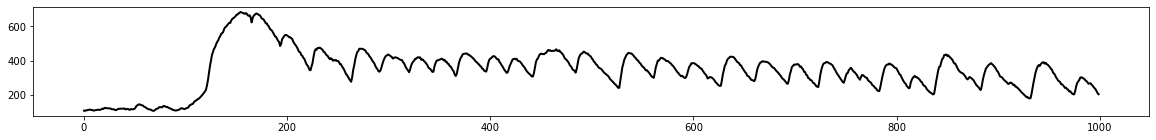

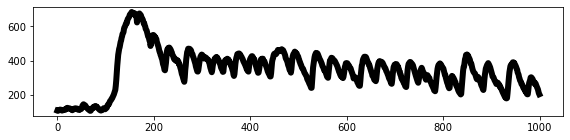

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


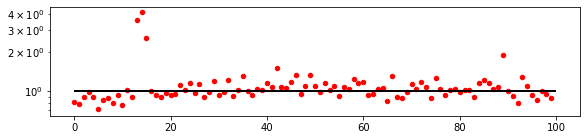

In [17]:
o = 4
p20 = np.load(gen_list[o])

bind = np.load(sub_bin_list[o])
nnb = np.load(sub_nnb_list[o])

mean = np.apply_along_axis(np.mean, 0, p20)

fig, ax = plt.subplots(figsize= (20,2))  
start = 100
stop = 1000
#plt.plot(mean, linewidth = 2, c= 'k')
#for x in np.arange(start, start+stop): plt.axvline(x=x, c='red',alpha = 0.05)

plt.plot(mean[start:start+stop], linewidth = 2, c= 'k')
plt.show()

br_l_4 = br_evol(bind, nnb, start)


fig, ax = plt.subplots(figsize= (9.5,2))  
plt.plot(mean[start:start+stop], linewidth = 6, c= 'k')
plt.savefig(Ffig + 'mean_4.svg', transparent=True)
plt.show()


fig, ax = plt.subplots(figsize= (9.5,2))  
plt.scatter(np.arange(0,100), br_l_4, c='red', s = 20)
plt.hlines(1,0,100, linestyles='-', linewidth=2)
plt.yscale('log')
plt.ylim(0)
plt.savefig(Ffig + 'mean_4_BR.svg', transparent=True)
plt.show()

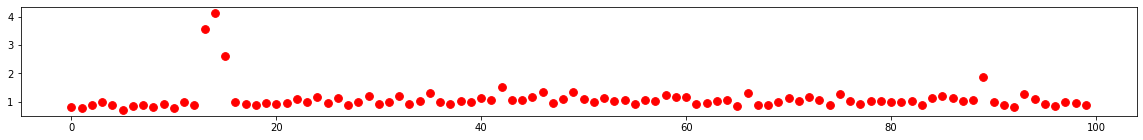

In [254]:
fig, ax = plt.subplots(figsize= (20,2))  
plt.scatter(np.arange(0,100), br_l_4, c='red', s = 60)
#plt.ylim(0.8, 1.3)
plt.show()

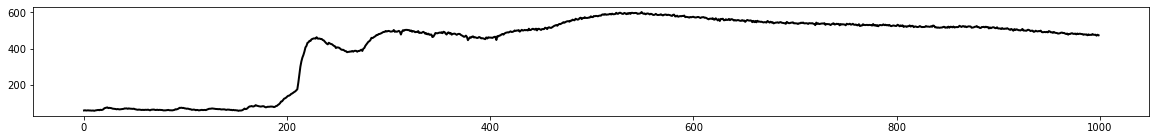

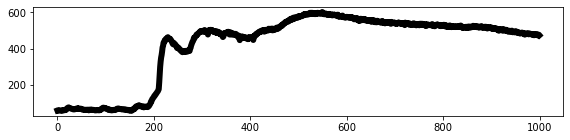

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


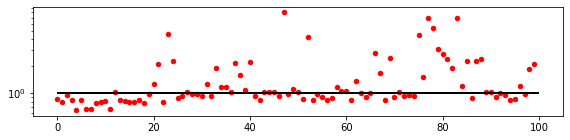

In [19]:
o = 5
p20 = np.load(gen_list[o])

bind = np.load(sub_bin_list[o])
nnb = np.load(sub_nnb_list[o])

mean = np.apply_along_axis(np.mean, 0, p20)

fig, ax = plt.subplots(figsize= (20,2))  
start = 2900
stop = 1000
#plt.plot(mean, linewidth = 2, c= 'k')
#for x in np.arange(start, start+stop): plt.axvline(x=x, c='red',alpha = 0.05)

plt.plot(mean[start:start+stop], linewidth = 2, c= 'k')
plt.show()

br_l_5 = br_evol(bind, nnb, start)

fig, ax = plt.subplots(figsize= (9.5,2))  
plt.plot(mean[start:start+stop], linewidth = 6, c= 'k')
plt.savefig(Ffig + 'mean_5.svg', transparent=True)
plt.show()


fig, ax = plt.subplots(figsize= (9.5,2))  
plt.scatter(np.arange(0,100), br_l_5, c='red', s = 20)
plt.hlines(1,0,100, linestyles='-', linewidth=2)
plt.yscale('log')
plt.ylim(0)
plt.savefig(Ffig + 'mean_5_BR.svg', transparent=True)
plt.show()

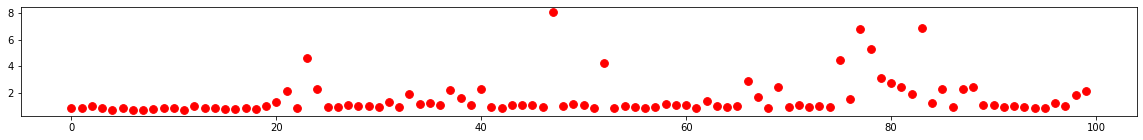

In [265]:
fig, ax = plt.subplots(figsize= (20,2))  
plt.scatter(np.arange(0,100), br_l_5, c='red', s = 60)
#plt.ylim(0.5, 2)
plt.show()

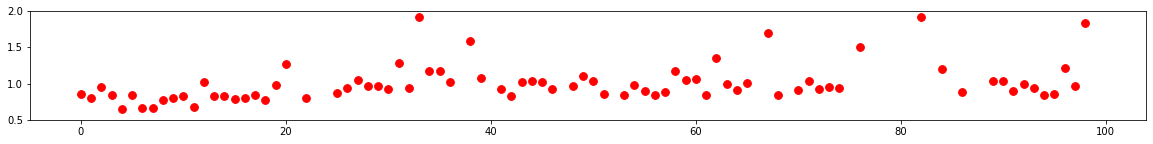

In [264]:
fig, ax = plt.subplots(figsize= (20,2))  
plt.scatter(np.arange(0,100), br_l_5, c='red', s = 60)
plt.ylim(0.5, 2)
plt.show()

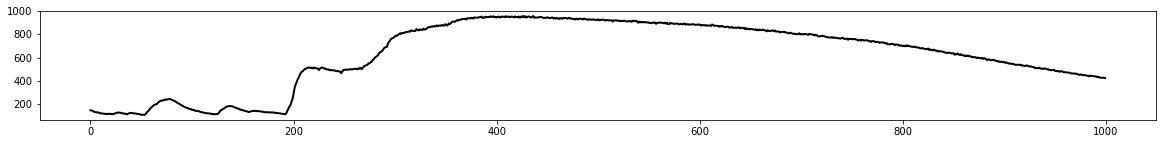

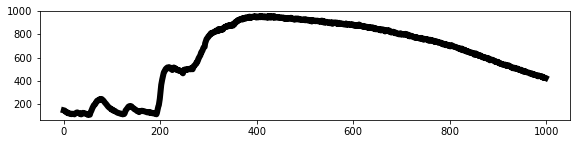

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


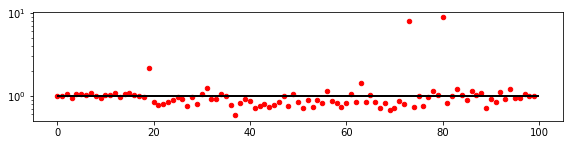

In [20]:
o = 6
p20 = np.load(gen_list[o])

bind = np.load(sub_bin_list[o])
nnb = np.load(sub_nnb_list[o])

mean = np.apply_along_axis(np.mean, 0, p20)

fig, ax = plt.subplots(figsize= (20,2))  
start = 1350
stop = 1000
#plt.plot(mean, linewidth = 2, c= 'k')
#for x in np.arange(start, start+stop): plt.axvline(x=x, c='red',alpha = 0.05)

plt.plot(mean[start:start+stop], linewidth = 2, c= 'k')
plt.show()

br_l_6 = br_evol(bind, nnb, start)

fig, ax = plt.subplots(figsize= (9.5,2))  
plt.plot(mean[start:start+stop], linewidth = 6, c= 'k')
plt.savefig(Ffig + 'mean_6.svg', transparent=True)
plt.show()


fig, ax = plt.subplots(figsize= (9.5,2))  
plt.scatter(np.arange(0,100), br_l_6, c='red', s = 20)
plt.hlines(1,0,100, linestyles='-', linewidth=2)
plt.yscale('log')
plt.ylim(0)
plt.savefig(Ffig + 'mean_6_BR.svg', transparent=True)
plt.show()

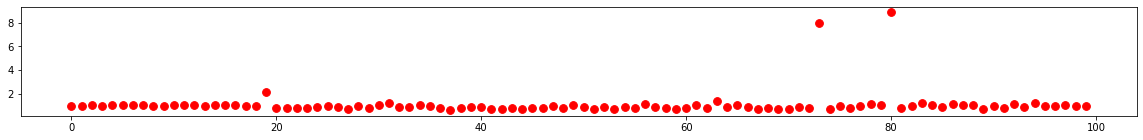

In [258]:
fig, ax = plt.subplots(figsize= (20,2))  
plt.scatter(np.arange(0,100), br_l_6, c='red', s = 60)
#plt.ylim(0.8, 1.3)
plt.show()

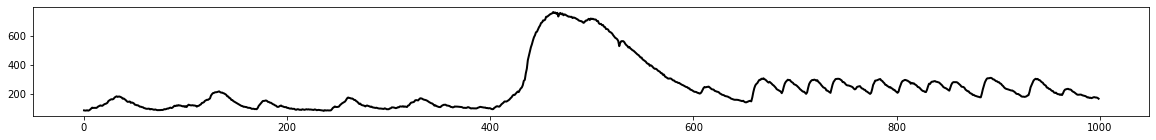

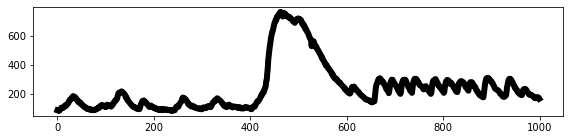

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


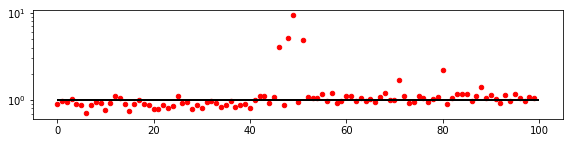

In [21]:
o = 7
p20 = np.load(gen_list[o])

bind = np.load(sub_bin_list[o])
nnb = np.load(sub_nnb_list[o])

mean = np.apply_along_axis(np.mean, 0, p20)

fig, ax = plt.subplots(figsize= (20,2))  
start = 3000
stop = 1000
#plt.plot(mean, linewidth = 2, c= 'k')
#for x in np.arange(start, start+stop): plt.axvline(x=x, c='red',alpha = 0.05)

plt.plot(mean[start:start+stop], linewidth = 2, c= 'k')
plt.show()

br_l_7 = br_evol(bind, nnb, start)


fig, ax = plt.subplots(figsize= (9.5,2))  
plt.plot(mean[start:start+stop], linewidth = 6, c= 'k')
plt.savefig(Ffig + 'mean_7.svg', transparent=True)
plt.show()


fig, ax = plt.subplots(figsize= (9.5,2))  
plt.scatter(np.arange(0,100), br_l_7, c='red', s = 20)
plt.hlines(1,0,100, linestyles='-', linewidth=2)
plt.yscale('log')
plt.ylim(0)
plt.savefig(Ffig + 'mean_7_BR.svg', transparent=True)
plt.show()

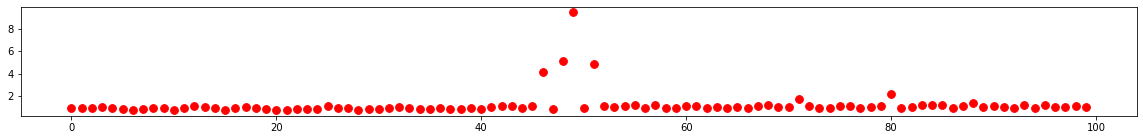

In [260]:
fig, ax = plt.subplots(figsize= (20,2))  
plt.scatter(np.arange(0,100), br_l_7, c='red', s = 60)
#plt.ylim(0.8, 1.3)
plt.show()

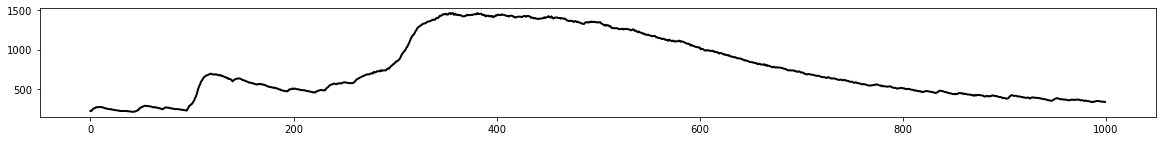

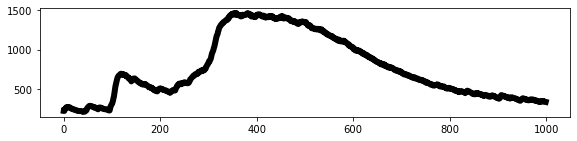

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


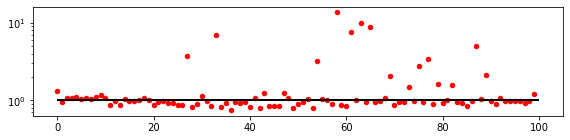

In [22]:
o = 8
p20 = np.load(gen_list[o])

bind = np.load(sub_bin_list[o])
nnb = np.load(sub_nnb_list[o])

mean = np.apply_along_axis(np.mean, 0, p20)

fig, ax = plt.subplots(figsize= (20,2))  
start = 2500
stop = 1000
#plt.plot(mean, linewidth = 2, c= 'k')
#for x in np.arange(start, start+stop): plt.axvline(x=x, c='red',alpha = 0.05)

plt.plot(mean[start:start+stop], linewidth = 2, c= 'k')
plt.show()

br_l_8 = br_evol(bind, nnb, start)

fig, ax = plt.subplots(figsize= (9.5,2))  
plt.plot(mean[start:start+stop], linewidth = 6, c= 'k')
plt.savefig(Ffig + 'mean_8.svg', transparent=True)
plt.show()


fig, ax = plt.subplots(figsize= (9.5,2))  
plt.scatter(np.arange(0,100), br_l_8, c='red', s = 20)
plt.hlines(1,0,100, linestyles='-', linewidth=2)
plt.yscale('log')
plt.ylim(0)
plt.savefig(Ffig + 'mean_8_BR.svg', transparent=True)
plt.show()

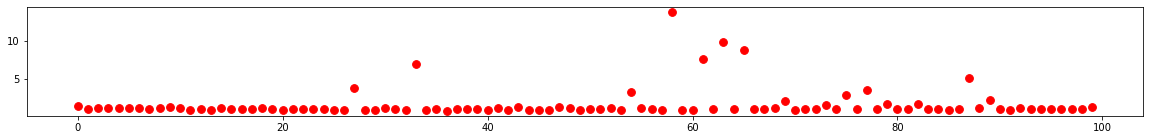

In [262]:
fig, ax = plt.subplots(figsize= (20,2))  
plt.scatter(np.arange(0,100), br_l_8, c='red', s = 60)
#plt.ylim(0.8, 1.3)
plt.show()

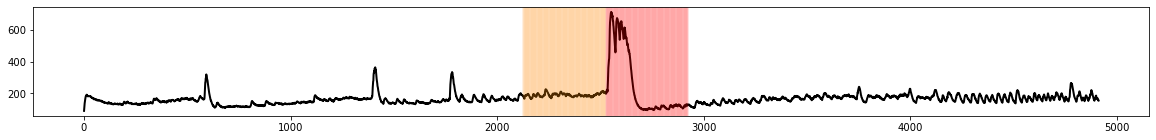

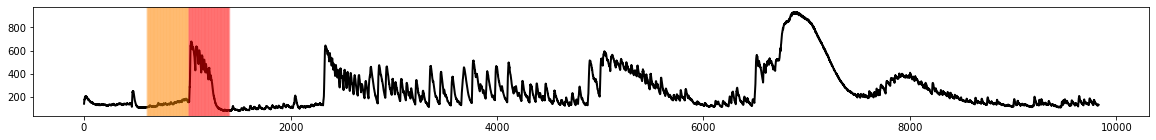

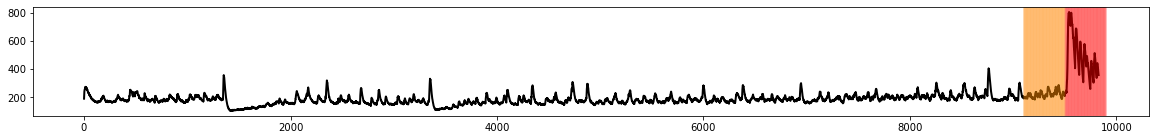

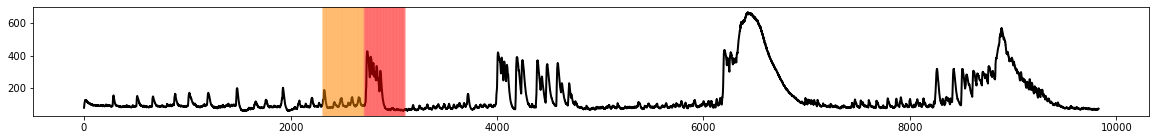

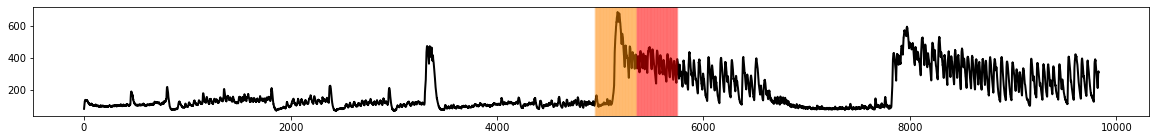

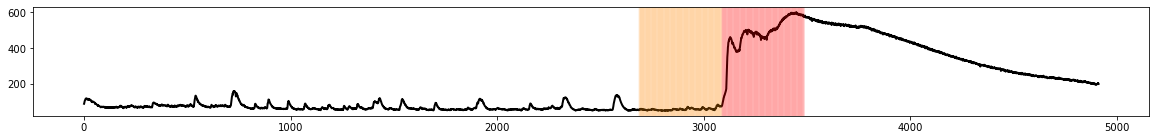

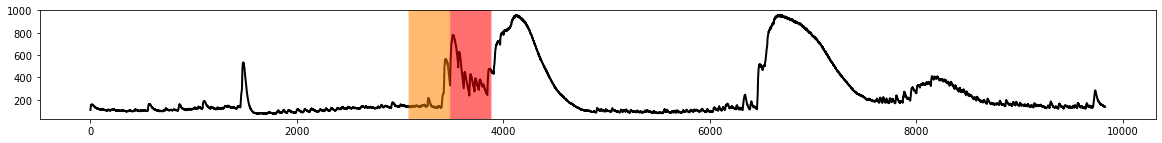

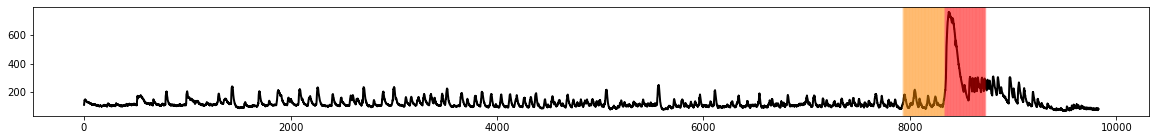

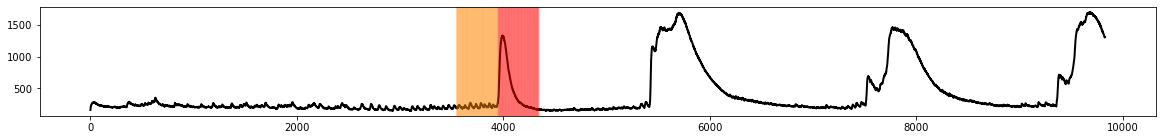

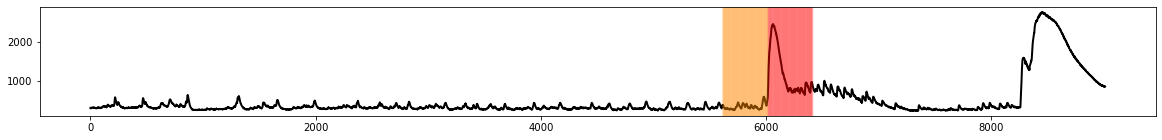

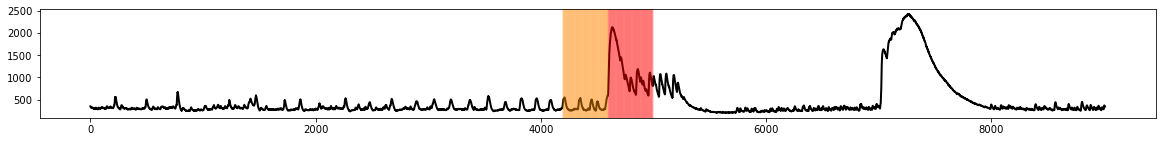

In [5]:
max_list = list(range(len(gen_list)))
for o in range(len(gen_list)):
    p20 = np.load(gen_list[o])
    mean = np.apply_along_axis(np.mean, 0, p20)

    #Apply sliding window over mean trace
    window = adfn.window(30, mean.shape[0])[0]
    diffs = list(range(mean.shape[0] - window))
    for t in range(mean.shape[0]):
        if t == mean.shape[0] - window:
            break
        diff_vec = np.zeros(window)
        for e in range(window):
            diff_vec[e] = mean[t+e] - mean[t] 
        diffs[t] = diff_vec
    
    sums, maxs = list(range(len(diffs))),list(range(len(diffs)))
    #over each time window, find the maximum difference between any 2 time frames - take max as start of seizure
    for i in range(len(diffs)):
        maxs[i] = np.max(diffs[i])

    fig, ax = plt.subplots(figsize= (20,2))  
    if o == 4:
        when = (mean.shape[0]/2) + 437
    else:
        when = np.where(maxs ==  np.max(maxs))[0]
    plt.plot(mean, linewidth = 2, c= 'k')
    for x in np.arange(when, when+400): plt.axvline(x=x, c='red',alpha = 0.05)
    for x in np.arange(when-400, when): plt.axvline(x=x, c='darkorange',alpha = 0.05)
    plt.show()

# Correlation function

In [40]:
# Create lists of trace data
#---------------------------------------------------------------------------
import glob

experiment = 'PTZ-WILDTYPE'
os.chdir(Fdata + experiment)
tracelist = sorted(glob.glob('*_PTZ*cut*realtrace*')) 
distlist = sorted(glob.glob('*_PTZ*dist.npy*')) 
binlist = sorted(glob.glob('*_corrdist*'))
coordlist = sorted(glob.glob('*_PTZ*realcoord*'))
blnlist = sorted(glob.glob('*BLN*_corrdist_bins.*'))
p5list = sorted(glob.glob('*PTZ05*_corrdist_bins.*'))
p20list = sorted(glob.glob('*PTZ20*_corrdist_bins.*'))

blnlist, p5list, p20list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_corrdist_bins.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_corrdist_bins.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_corrdist_bins.npy

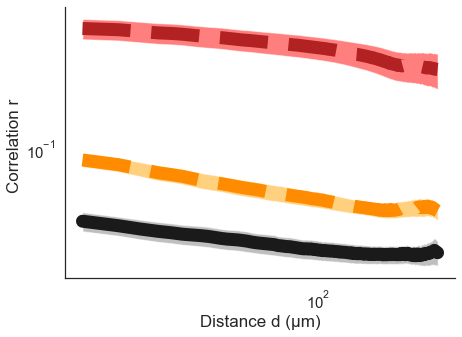

In [19]:
from scipy import stats

bln_distlist = [np.load(blnlist[i])[0] [:189]  for i in range(len(blnlist))]
p5_distlist = [np.load(p5list[i])[0][:189] for i in range(len(p5list))]
p20_distlist = [np.load(p20list[i])[0][:189] for i in range(len(p20list))]

bln_corrlist = [np.load(blnlist[i])[1][:189] for i in range(len(blnlist))]
p5_corrlist = [np.load(p5list[i])[1][:189] for i in range(len(p5list))]
p20_corrlist = [np.load(p20list[i])[1][:189] for i in range(len(p20list))]

mean_dist = np.mean(np.vstack((p20_distlist,np.vstack((np.vstack(p5_distlist), np.vstack(bln_distlist))))), axis= 0)

listlist = bln_corrlist, p5_corrlist, p20_corrlist
colors = ['k', 'darkorange','firebrick']
facecolors = ['grey', 'orange','red']

lines = ['-', '--', '--']
widths = [13, 13, 13]
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(3):
    sem = stats.sem(listlist[i])
    xaxis = mean_dist*0.8
    yaxis = np.mean(listlist[i], axis=0)
    minus = yaxis-(sem)
    plus = yaxis+(sem)

    axarr.fill_between(xaxis[1:len(xaxis)-1], minus[1:len(xaxis)-1], plus[1:len(xaxis)-1],facecolor=facecolors[i],alpha=0.5)
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = widths[i], markersize = 1, alpha = 1, color = colors[i], linestyle = lines[i])

    
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('Distance d (μm)', size = '17')
axarr.set_ylabel('Correlation r ', size = '17')
plt.yticks(size = 15)
plt.xticks(size = 15)

axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'corrdis_ptz_mean.svg', transparent = True)
plt.show()

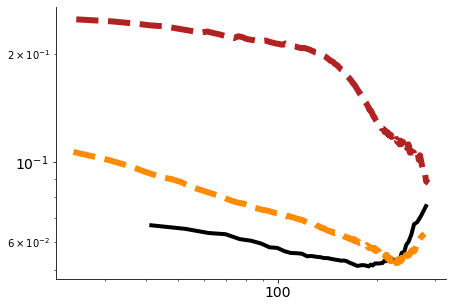

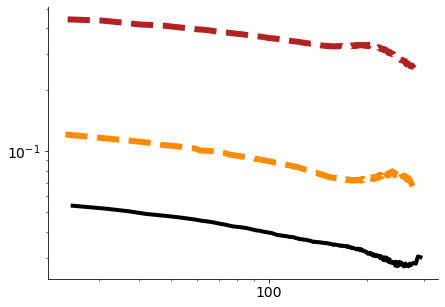

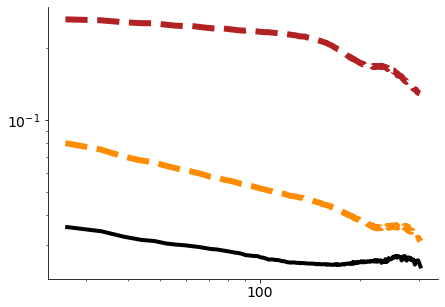

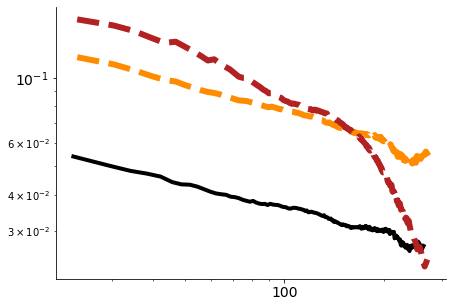

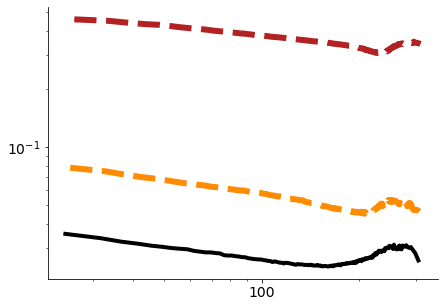

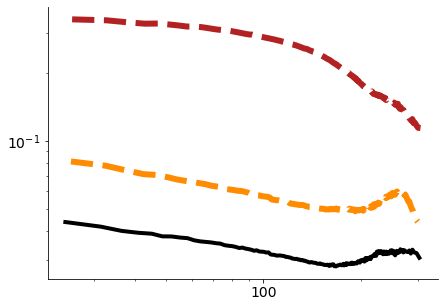

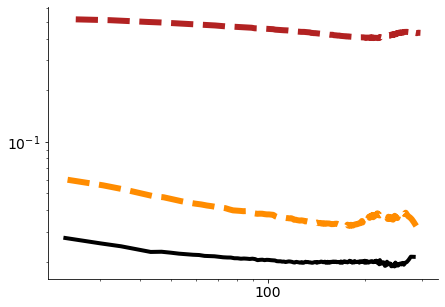

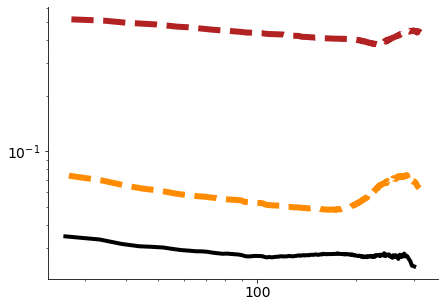

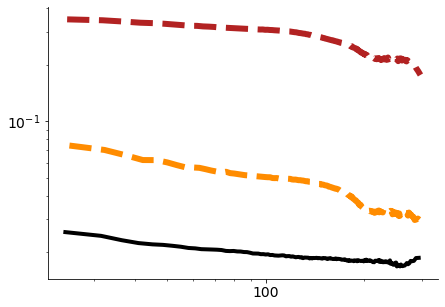

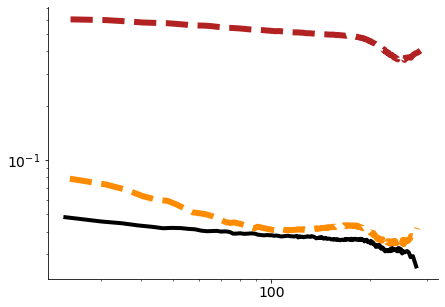

In [41]:
import seaborn as sns

import matplotlib
import powerlaw
sns.reset_orig()
num1 = adfn.name_zero('front',2,12,1)
blnslope, p5slope, p20slope = list(range(10)), list(range(10)), list(range(10))
blncorr, precorr, p20corr = list(range(10)), list(range(10)), list(range(10))

colors = ['black', 'darkorange','firebrick']
lines = ['-', '--', '--']
widths = [4, 6, 6]

count=0
for i in num1:
    if i != '03':
        os.chdir(Fdata + experiment)
        blnlist = sorted(glob.glob('*E-' + i + '*BLN*corrdist_bins*'))
        p5list = sorted(glob.glob('*E-' + i + '*PTZ05*corrdist_bins*'))
        p20list = sorted(glob.glob('*E-' + i + '*PTZ20*corrdist_bins*'))
        plotlist = [blnlist,p5list,p20list]
        slopelist = [blnslope,p5slope,p20slope]
        corrlist = [blncorr,precorr,p20corr]

        fig, axarr = plt.subplots(figsize = (7,5))
        for e in range(len(plotlist)):
            data = np.load(plotlist[e][0])
            xaxis = data[0]
            yaxis = data[1]
            axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = widths[e], markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
            slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:150]),np.log10(yaxis[:len(xaxis)-1][1:150]))[0]
            m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
            y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
            corrlist[e][count] = np.linalg.norm(yaxis[1:]-y_fit) #stats.pearsonr(yaxis[1:], y_fit)[0]
            #axarr.plot(xaxis[1:len(xaxis)-1], y_fit[1:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, color ='k', linestyle = '-')

        count+=1
        axarr.set_xscale('log')
        axarr.set_yscale('log')
        #axarr.set_xlabel('Distance d (μm)', size = '13')
        #axarr.set_ylabel('Correlation c ', size = '13')

        axarr.set_xticklabels(['100', '100', '100', '100'])
        axarr.spines['top'].set_visible(False)
        axarr.spines['right'].set_visible(False)
        plt.yticks(fontsize = 14)
        plt.xticks(fontsize = 14)

        #plt.savefig(Ffig + 'corrdist_sz' + str(count) + '.svg', transparent = True)
        plt.show()

In [42]:
slopelist

[[0.047036239317652495,
  0.29743475886346554,
  0.1167919605495675,
  0.2692912523507915,
  0.09109442621898949,
  0.16199810183382876,
  0.0916919106005681,
  0.05495801612123997,
  0.13707662076140784,
  0.13208925342229125],
 [0.3200289054413256,
  0.278749680549607,
  0.405793250997515,
  0.3230146796918803,
  0.2548331569885358,
  0.19161511165249312,
  0.20283533851888141,
  -0.002313301435768487,
  0.4064543611508317,
  0.2244380889568653],
 [0.45443615994490005,
  0.15525475986394316,
  0.2952676205856262,
  0.659388829892367,
  0.20360775993432045,
  0.49518502825785504,
  0.13667917719584483,
  0.13790424967440307,
  0.2836987341550665,
  0.16754028632129142]]

In [44]:
dcc = np.zeros((30))
dcc_list = slopelist
fli = list(range(10))
flist=[]
for i in range(10):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)
    
count=0
for i in range(len(dcc_list)):
    for y in range(9):
        dcc[count] = dcc_list[i][y]
        count+=1
dcc_df = pd.DataFrame({"exponent":dcc , "Labels":  np.append(adfn.repeat_list('Baseline',10),np.append(adfn.repeat_list('PTZ 5mM',10),adfn.repeat_list('PTZ 20mM',10))), "Fish":flist})


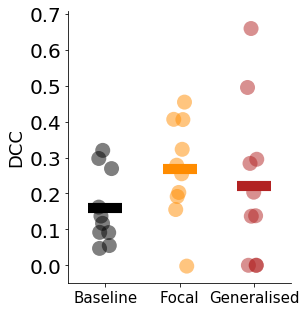

In [46]:
from matplotlib.collections import PathCollection
import seaborn as sns
from matplotlib import cm
colors2 = ['black','darkorange','firebrick']
fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="exponent", data = dcc_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="DCC", data=dcc_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="exponent", data=dcc_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)
plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('DCC', size = '18')
ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'corrdist_slope_ptz.svg', transparent = True)
plt.show()

In [47]:
from scipy import stats
data = slopelist[0]
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

from scipy import stats
data = slopelist[1]
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

from scipy import stats
data = slopelist[2]
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.13994625400398025 0.02649850822929888
0.2605449272512167 0.03781113265160096
0.29889626058256175 0.05697182010548122


In [48]:
for i in range(len(slopelist)):
    p = stats.normaltest(slopelist[i])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [51]:
#BLN - SZ
alpha = 0.05/2

t, p = stats.ttest_rel(slopelist[0], slopelist[1])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')
    
#BLN - SZ
alpha = 0.05/2

t, p = stats.ttest_rel(slopelist[0], slopelist[2])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -3.0549561483803926   p = 0.013682772431227229
Samples are significantly different
t = -2.8865562638289624   p = 0.017984876619811997
Samples are significantly different


In [50]:
#BLN - SZ
alpha = 0.05/2

t, p = stats.ttest_rel(slopelist[0], slopelist[2])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -2.8865562638289624   p = 0.017984876619811997
Samples are significantly different


In [21]:
#EUCLIDEAN DISTANCe
import pandas as pd

exp = np.zeros((30))
fli = list(range(10))
flist=[]
for i in range(10):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

eu_df = pd.DataFrame({"Distance":np.append(corrlist[0],np.append(corrlist[1], corrlist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',10),np.append(adfn.repeat_list('Pre-ictal',10),adfn.repeat_list('Ictal',10))), "Fish":flist})

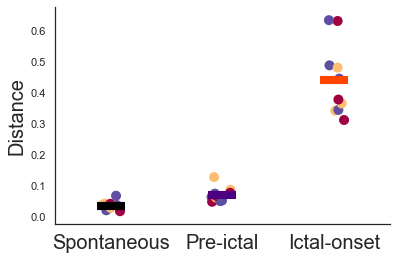

In [22]:
from matplotlib import cm
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))

colors2 = ['black', 'indigo','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=4, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Distance", data = eu_df, hue = 'Fish', palette = new_colors, size = 10, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Distance', size = '20')
ax.set_xticklabels(['Spontaneous', 'Pre-ictal', 'Ictal-onset'], size = 20)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
#plt.savefig(Ffig + 'corrdist_eu_trans.svg', transparent = True)
plt.show()

In [23]:
bln_cd = eu_df[eu_df['Labels'] == 'Baseline']
pre_cd = eu_df[eu_df['Labels'] == 'Pre-ictal']
sz_cd = eu_df[eu_df['Labels'] == 'Ictal']

cd_list = bln_cd, pre_cd, sz_cd

from scipy import stats
data = bln_cd['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

data = pre_cd['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

data = sz_cd['Distance']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.03531171857735874 0.004427647462494652
0.07073042084711262 0.007450284409446908
0.44182993883103217 0.03692997313922427


In [14]:
for i in range(len(cd_list)):
    p = stats.normaltest(cd_list[i]['Distance'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [15]:
from scipy.stats import wilcoxon
alpha = 0.05/2

w, p = wilcoxon(bln_cd['Distance'], pre_cd['Distance'], mode='auto')
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 1.0   p = 0.00390625
Samples are significantly different


In [16]:
from scipy.stats import wilcoxon
alpha = 0.05/2

w, p = wilcoxon(bln_cd['Distance'], sz_cd['Distance'], mode='auto')
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 0.0   p = 0.001953125
Samples are significantly different
